In [2]:
import numpy as np
import pandas as pd
import pickle
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib.axes as axs
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

# Data Preparation

In [3]:
df_purchase = pd.read_csv('D://z/purchase data.csv')

In [4]:
pd.options.display.max_columns = None

In [5]:
#import scaler
scaler = pickle.load(open('scaler.pickle','rb'))
# Import PCA
pca = pickle.load(open('pca.pickle','rb'))
# Import Kmeans-PCA
kmeans_pca = pickle.load(open('kmeans_pca.pickle','rb'))
# Features we will work with
features = df_purchase[['Sex','Marital status','Age','Education','Income','Occupation','Settlement size']]
df_purchase_seg_strd = scaler.transform(features)
# Aplly PCA
df_purchase_seg_pca = pca.transform(df_purchase_seg_strd)
# Apply kmeans-PCA
df_purchase_seg_kmeans_pca = kmeans_pca.predict(df_purchase_seg_pca)
# Copy the dataframe
df_purchase_predictors = df_purchase.copy()
# Add segment Labels
df_purchase_predictors['segment'] = df_purchase_seg_kmeans_pca
# dummies
segment_dummies = pd.get_dummies(df_purchase_predictors['segment'],prefix='segment',prefix_sep = '_')
df_purchase_predictors = pd.concat([df_purchase_predictors,segment_dummies],axis=1)
df_pa = df_purchase_predictors
df_pa.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,Price_4,Price_5,Promotion_1,Promotion_2,Promotion_3,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,segment,segment_0,segment_1,segment_2,segment_3
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,2.09,2.66,0,1,0,0,0,0,0,47,1,110866,1,0,1,0,1,0,0
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,2.09,2.66,0,0,0,0,0,0,0,47,1,110866,1,0,1,0,1,0,0
2,200000001,12,0,0,0,0,0,1.51,1.89,1.99,2.09,2.66,0,0,0,0,0,0,0,47,1,110866,1,0,1,0,1,0,0
3,200000001,16,0,0,0,0,0,1.52,1.89,1.98,2.09,2.66,0,0,0,0,0,0,0,47,1,110866,1,0,1,0,1,0,0
4,200000001,18,0,0,0,0,0,1.52,1.89,1.99,2.09,2.66,0,0,0,0,0,0,0,47,1,110866,1,0,1,0,1,0,0


## Creating The Model (Logistic Regression)

In [6]:
# definig our output values (y)
y = df_pa['Incidence']
# Defining our independant variable which is price, so we will get the mean of all brand's prices 
x = pd.DataFrame()
x['mean_price'] = (df_pa['Price_1']+
                  df_pa['Price_2']+
                  df_pa['Price_3']+
                  df_pa['Price_4']+
                  df_pa['Price_5']) / 5
                  

In [7]:
x.head()

,mean_price
0,2.044
1,2.028
2,2.028
3,2.028
4,2.030


In [8]:
log_model = LogisticRegression()

In [9]:
log_model.fit(x,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [10]:
log_model.coef_

array([[-2.3480548]])

##### Means that there is a negative relationship between the independent variable (price) and the output(Incidence), means as the price decrease the probability customer to purchase increases.

## Price Elasticity


In [11]:
df_pa[['Price_1','Price_2','Price_3','Price_4','Price_5']].describe()

,Price_1,Price_2,Price_3,Price_4,Price_5
count,58693.000000,58693.000000,58693.000000,58693.000000,58693.000000
mean,1.392074,1.780999,2.006789,2.159945,2.654798
std,0.091139,0.170868,0.046867,0.089825,0.098272
min,1.100000,1.260000,1.870000,1.760000,2.110000
25%,1.340000,1.580000,1.970000,2.120000,2.630000
50%,1.390000,1.880000,2.010000,2.170000,2.670000
75%,1.470000,1.890000,2.060000,2.240000,2.700000
max,1.590000,1.900000,2.140000,2.260000,2.800000


In [14]:
price_range = np.arange(0.5,3.5,.01)
price_range

array([0.5 , 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6 ,
       0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.7 , 0.71,
       0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8 , 0.81, 0.82,
       0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9 , 0.91, 0.92, 0.93,
       0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1.  , 1.01, 1.02, 1.03, 1.04,
       1.05, 1.06, 1.07, 1.08, 1.09, 1.1 , 1.11, 1.12, 1.13, 1.14, 1.15,
       1.16, 1.17, 1.18, 1.19, 1.2 , 1.21, 1.22, 1.23, 1.24, 1.25, 1.26,
       1.27, 1.28, 1.29, 1.3 , 1.31, 1.32, 1.33, 1.34, 1.35, 1.36, 1.37,
       1.38, 1.39, 1.4 , 1.41, 1.42, 1.43, 1.44, 1.45, 1.46, 1.47, 1.48,
       1.49, 1.5 , 1.51, 1.52, 1.53, 1.54, 1.55, 1.56, 1.57, 1.58, 1.59,
       1.6 , 1.61, 1.62, 1.63, 1.64, 1.65, 1.66, 1.67, 1.68, 1.69, 1.7 ,
       1.71, 1.72, 1.73, 1.74, 1.75, 1.76, 1.77, 1.78, 1.79, 1.8 , 1.81,
       1.82, 1.83, 1.84, 1.85, 1.86, 1.87, 1.88, 1.89, 1.9 , 1.91, 1.92,
       1.93, 1.94, 1.95, 1.96, 1.97, 1.98, 1.99, 2.

In [15]:
# Creating dataframe for price range
df_price_range = pd.DataFrame(price_range)
df_price_range

,0
0,0.50
1,0.51
2,0.52
3,0.53
4,0.54
...,...
295,3.45
296,3.46
297,3.47
298,3.48


In [16]:
# y probability in different prices
y_prob = log_model.predict_proba(df_price_range)
y_prob

array([[0.08210697, 0.91789303],
       [0.08389404, 0.91610596],
       [0.08571638, 0.91428362],
       [0.08757452, 0.91242548],
       [0.089469  , 0.910531  ],
       [0.09140035, 0.90859965],
       [0.09336912, 0.90663088],
       [0.09537585, 0.90462415],
       [0.09742107, 0.90257893],
       [0.09950533, 0.90049467],
       [0.10162915, 0.89837085],
       [0.10379308, 0.89620692],
       [0.10599766, 0.89400234],
       [0.1082434 , 0.8917566 ],
       [0.11053083, 0.88946917],
       [0.11286049, 0.88713951],
       [0.11523289, 0.88476711],
       [0.11764855, 0.88235145],
       [0.12010797, 0.87989203],
       [0.12261166, 0.87738834],
       [0.12516012, 0.87483988],
       [0.12775383, 0.87224617],
       [0.13039328, 0.86960672],
       [0.13307895, 0.86692105],
       [0.13581129, 0.86418871],
       [0.13859076, 0.86140924],
       [0.14141781, 0.85858219],
       [0.14429286, 0.85570714],
       [0.14721634, 0.85278366],
       [0.15018866, 0.84981134],
       [0.

In [17]:
# Purchase probability 
purchase_prob = y_prob[:,1]


In [18]:
# Purchase Elasticity estimation
pe = log_model.coef_[:,0] * price_range * (1-purchase_prob)


In [19]:
df_price_elasticities = pd.DataFrame(price_range)
df_price_elasticities = df_price_elasticities.rename(columns={0:'Price_point'})
df_price_elasticities['Mean_pe'] = pe
df_price_elasticities

,Price_point,Mean_pe
0,0.50,-0.096396
1,0.51,-0.100464
2,0.52,-0.104659
3,0.53,-0.108984
4,0.54,-0.113442
...,...,...
295,3.45,-8.012897
296,3.46,-8.038147
297,3.47,-8.063363
298,3.48,-8.088544


In [16]:
# For displaying all rows
pd.options.display.max_rows = None

In [17]:
df_price_elasticities

,Price_point,Mean_pe
0,0.50,-0.096396
1,0.51,-0.100464
2,0.52,-0.104659
3,0.53,-0.108984
4,0.54,-0.113442
5,0.55,-0.118037
6,0.56,-0.122772
7,0.57,-0.127650
8,0.58,-0.132675
9,0.59,-0.137850


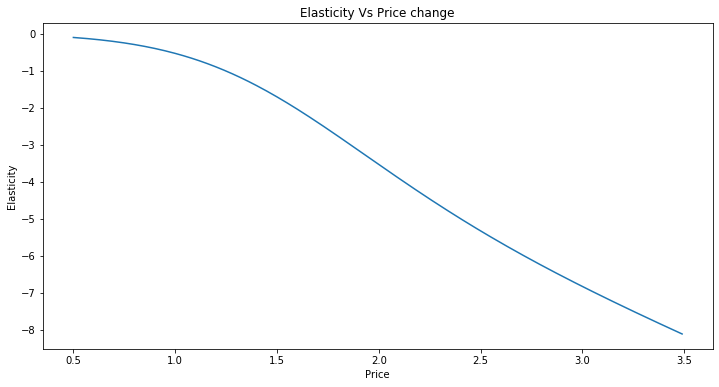

In [20]:
# plotting elasticity against price
plt.figure(figsize=(12,6))
plt.plot(price_range,pe)
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Elasticity Vs Price change');

##### As the elasticity increases the price decrease, inversely proportional realationship, after 100% elasticity the price will be elastic and the recommendation will be not increase the price. otherwise as long as the elasticity under 1 the product is inelastic and we allowed to cautiously increase the price without losing customer up to 1.25.

## Purchase Probability By Segments 

({0:'Well-Off',1:'Fewer-oppurtunity',2:'Standard',3:'Career-Focused'})

## Fewer Opportunities Segment (color: m)

In [19]:
# Fisrt we should determijne the first segment from the df_pa dataframe for each segment 
df_pa_segment_1 = df_pa[df_pa['segment']==1] # Fewer_opportunities segment
df_pa_segment_1.columns

Index(['ID', 'Day', 'Incidence', 'Brand', 'Quantity', 'Last_Inc_Brand',
       'Last_Inc_Quantity', 'Price_1', 'Price_2', 'Price_3', 'Price_4',
       'Price_5', 'Promotion_1', 'Promotion_2', 'Promotion_3', 'Promotion_4',
       'Promotion_5', 'Sex', 'Marital status', 'Age', 'Education', 'Income',
       'Occupation', 'Settlement size', 'segment', 'segment_0', 'segment_1',
       'segment_2', 'segment_3'],
      dtype='object')

In [24]:
# Defining x and y 
y = df_pa_segment_1['Incidence']
x = pd.DataFrame()
x['Mean_price'] = (df_pa_segment_1['Price_1']+
                  df_pa_segment_1['Price_2']+
                  df_pa_segment_1['Price_3']+
                  df_pa_segment_1['Price_4']+
                  df_pa_segment_1['Price_5'])/5

In [25]:
# Fit the logistic Regression Model
model_incidence_seg_1 = LogisticRegression()

In [26]:
model_incidence_seg_1.fit(x,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [27]:
model_incidence_seg_1.coef_

array([[-3.63713016]])

##### We can see that the coeffiecient of fewer oppurtunities segment is much higher than the average customer coefficient which in return will impact the price elasticity in this segment the price will be more elastic.

In [28]:
y_proba_seg_1 = model_incidence_seg_1.predict_proba(df_price_range)
y_proba_seg_1

array([[0.01704311, 0.98295689],
       [0.01766325, 0.98233675],
       [0.01830554, 0.98169446],
       [0.01897073, 0.98102927],
       [0.0196596 , 0.9803404 ],
       [0.02037298, 0.97962702],
       [0.02111168, 0.97888832],
       [0.02187656, 0.97812344],
       [0.02266852, 0.97733148],
       [0.02348846, 0.97651154],
       [0.02433732, 0.97566268],
       [0.02521606, 0.97478394],
       [0.02612568, 0.97387432],
       [0.02706721, 0.97293279],
       [0.02804168, 0.97195832],
       [0.0290502 , 0.9709498 ],
       [0.03009386, 0.96990614],
       [0.03117381, 0.96882619],
       [0.03229123, 0.96770877],
       [0.03344731, 0.96655269],
       [0.03464331, 0.96535669],
       [0.03588048, 0.96411952],
       [0.03716014, 0.96283986],
       [0.03848361, 0.96151639],
       [0.03985227, 0.96014773],
       [0.04126751, 0.95873249],
       [0.04273078, 0.95726922],
       [0.04424353, 0.95575647],
       [0.04580728, 0.95419272],
       [0.04742356, 0.95257644],
       [0.

In [29]:
purchase_prob_seg_1 = y_proba_seg_1[:,1]

In [30]:
# Calculate elasticity 
pe_seg_1 = model_incidence_seg_1.coef_[:,0] * price_range * (1-purchase_prob_seg_1)

In [31]:
# Creating Dataframe
df_price_elasticities_seg1 = pd.DataFrame(price_range)
df_price_elasticities_seg1 = df_price_elasticities_seg1.rename(columns={0:'Price_point'})
df_price_elasticities_seg1['Mean_pe'] = pe_seg_1
df_price_elasticities_seg1

,Price_point,Mean_pe
0,0.50,-0.030994
1,0.51,-0.032764
2,0.52,-0.034621
3,0.53,-0.036569
4,0.54,-0.038612
5,0.55,-0.040755
6,0.56,-0.043000
7,0.57,-0.045354
8,0.58,-0.047820
9,0.59,-0.050404


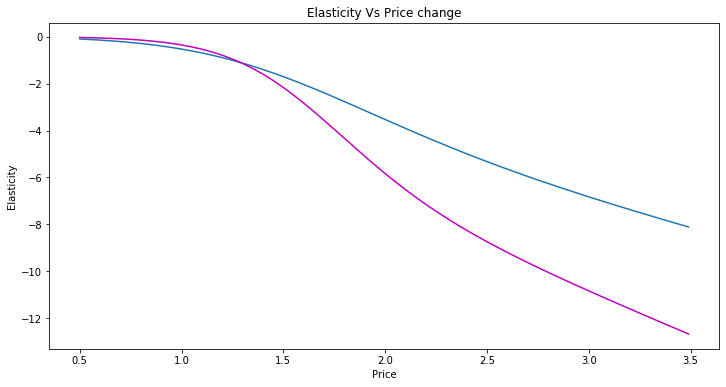

In [32]:
# plotting elasticity against price
plt.figure(figsize=(12,6))
plt.plot(price_range,pe)
plt.plot(price_range,pe_seg_1,color='m')
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Elasticity Vs Price change');

## Career Focused Segment (color: green)

In [33]:
# Fisrt we should determijne the first segment from the df_pa dataframe for each segment 
df_pa_segment_3 = df_pa[df_pa['segment']==3] # career focused segment
y = df_pa_segment_3['Incidence']
x = pd.DataFrame()
x['Mean_price'] = (df_pa_segment_3['Price_1']+
                  df_pa_segment_3['Price_2']+
                  df_pa_segment_3['Price_3']+
                  df_pa_segment_3['Price_4']+
                  df_pa_segment_3['Price_5'])/5
# Fit the logistic Regression Model
model_incidence_seg_3 = LogisticRegression()
model_incidence_seg_3.fit(x,y)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [34]:
model_incidence_seg_3.coef_

array([[-1.71191219]])

In [35]:
y_proba_seg_3 = model_incidence_seg_3.predict_proba(df_price_range)

In [36]:
purchase_prob_seg_3= y_proba_seg_3[:,1]

In [37]:
pe_seg_3 = model_incidence_seg_3.coef_[:,0] * price_range * (1-purchase_prob_seg_3)

In [38]:
# Creating Dataframe
df_price_elasticities_seg3 = pd.DataFrame(price_range)
df_price_elasticities_seg3 = df_price_elasticities_seg3.rename(columns={0:'Price_point'})
df_price_elasticities_seg3['Mean_pe'] = pe_seg_3
df_price_elasticities_seg1

,Price_point,Mean_pe
0,0.50,-0.030994
1,0.51,-0.032764
2,0.52,-0.034621
3,0.53,-0.036569
4,0.54,-0.038612
5,0.55,-0.040755
6,0.56,-0.043000
7,0.57,-0.045354
8,0.58,-0.047820
9,0.59,-0.050404


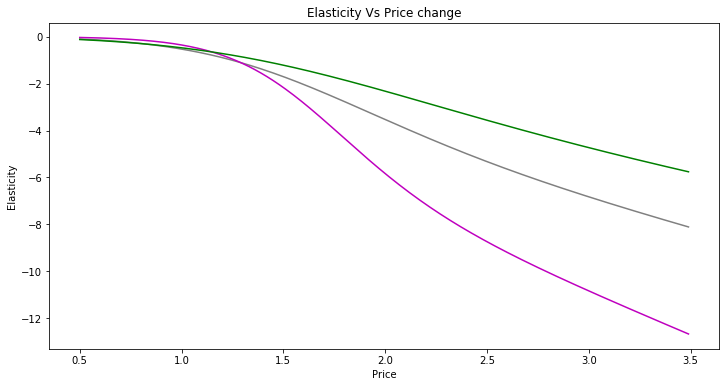

In [39]:
# plotting elasticity against price
plt.figure(figsize=(12,6))
plt.plot(price_range,pe,color='grey') # customer average
plt.plot(price_range,pe_seg_1,color='m') # fewer opportunities
plt.plot(price_range,pe_seg_3,color='green') # career focused
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Elasticity Vs Price change');

In [40]:
# Fisrt we should determijne the first segment from the df_pa dataframe for each segment 
df_pa_segment_0 = df_pa[df_pa['segment']==0] # career Well_off
y = df_pa_segment_0['Incidence']
x = pd.DataFrame()
x['Mean_price'] = (df_pa_segment_0['Price_1']+
                  df_pa_segment_0['Price_2']+
                  df_pa_segment_0['Price_3']+
                  df_pa_segment_0['Price_4']+
                  df_pa_segment_0['Price_5'])/5
# Fit the logistic Regression Model
model_incidence_seg_0 = LogisticRegression()
model_incidence_seg_0.fit(x,y)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [41]:
model_incidence_seg_0.coef_

array([[-1.24578907]])

In [42]:
y_proba_seg_0 = model_incidence_seg_0.predict_proba(df_price_range)

In [43]:
purchase_prob_seg_0= y_proba_seg_0[:,1]

In [44]:
pe_seg_0 = model_incidence_seg_0.coef_[:,0] * price_range * (1-purchase_prob_seg_0)

In [45]:
# Creating Dataframe
df_price_elasticities_seg0 = pd.DataFrame(price_range)
df_price_elasticities_seg0 = df_price_elasticities_seg0.rename(columns={0:'Price_point'})
df_price_elasticities_seg0['Mean_pe'] = pe_seg_0
df_price_elasticities_seg0

,Price_point,Mean_pe
0,0.50,-0.168042
1,0.51,-0.172967
2,0.52,-0.177962
3,0.53,-0.183027
4,0.54,-0.188165
5,0.55,-0.193374
6,0.56,-0.198655
7,0.57,-0.204009
8,0.58,-0.209436
9,0.59,-0.214936


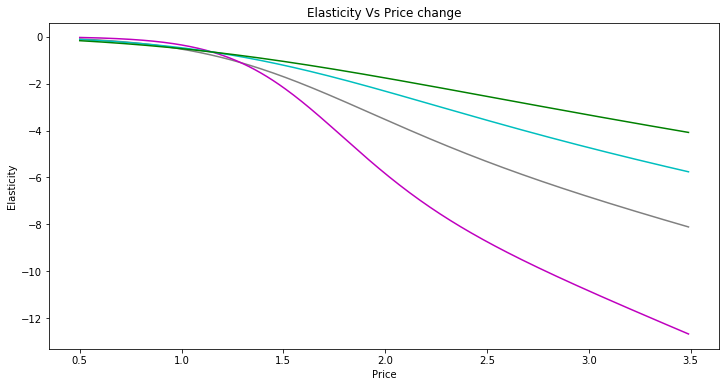

In [46]:
# plotting elasticity against price
plt.figure(figsize=(12,6))
plt.plot(price_range,pe,color='grey') # customer average
plt.plot(price_range,pe_seg_1,color='m') # fewer opportunities
plt.plot(price_range,pe_seg_3,color='c') # career focused
plt.plot(price_range,pe_seg_0,color='green') # Well OFF
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Elasticity Vs Price change');

In [47]:
# Fisrt we should determijne the first segment from the df_pa dataframe for each segment 
df_pa_segment_2 = df_pa[df_pa['segment']==2] # Fewer Opportunity
y = df_pa_segment_2['Incidence']
x = pd.DataFrame()
x['Mean_price'] = (df_pa_segment_2['Price_1']+
                  df_pa_segment_2['Price_2']+
                  df_pa_segment_2['Price_3']+
                  df_pa_segment_2['Price_4']+
                  df_pa_segment_2['Price_5'])/5
# Fit the logistic Regression Model
model_incidence_seg_2 = LogisticRegression()
model_incidence_seg_2.fit(x,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [48]:
model_incidence_seg_2.coef_

array([[-1.52462348]])

In [49]:
y_proba_seg_2 = model_incidence_seg_2.predict_proba(df_price_range)

In [50]:
purchase_prob_seg_2= y_proba_seg_2[:,1]

In [51]:
pe_seg_2 = model_incidence_seg_2.coef_[:,0] * price_range * (1-purchase_prob_seg_2)

In [52]:
# Creating Dataframe
df_price_elasticities_seg2 = pd.DataFrame(price_range)
df_price_elasticities_seg2 = df_price_elasticities_seg2.rename(columns={0:'Price_point'})
df_price_elasticities_seg2['Mean_pe'] = pe_seg_2
df_price_elasticities_seg2

,Price_point,Mean_pe
0,0.50,-0.210017
1,0.51,-0.216591
2,0.52,-0.223275
3,0.53,-0.230070
4,0.54,-0.236975
5,0.55,-0.243993
6,0.56,-0.251123
7,0.57,-0.258367
8,0.58,-0.265725
9,0.59,-0.273198


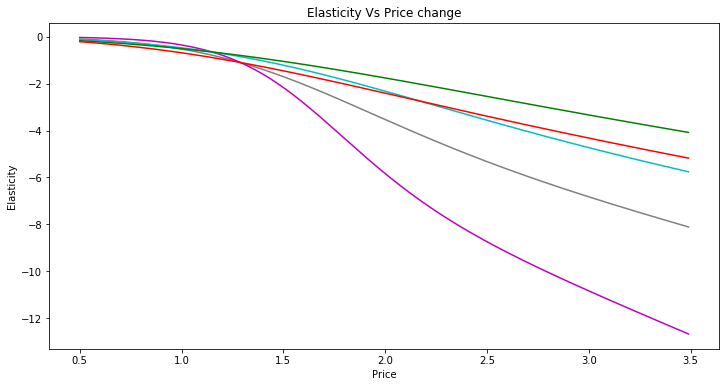

In [53]:
# plotting elasticity against price
plt.figure(figsize=(12,6))
plt.plot(price_range,pe,color='grey') # customer average
plt.plot(price_range,pe_seg_1,color='m') # fewer opportunities
plt.plot(price_range,pe_seg_3,color='c') # career focused
plt.plot(price_range,pe_seg_0,color='green') # Well OFF
plt.plot(price_range,pe_seg_2,color='r') # Standard
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Elasticity Vs Price change');

## Purchase Probability by Promotion

In [40]:
y = df_pa['Incidence']
x= pd.DataFrame()

In [41]:
x['Mean_price'] = (df_pa['Price_1']+
                  df_pa['Price_2']+
                  df_pa['Price_3']+
                  df_pa['Price_4']+
                  df_pa['Price_5'])/5

In [42]:
x['Mean_promotion'] = (df_pa['Promotion_1'] +
                       df_pa['Promotion_2'] +
                       df_pa['Promotion_3'] +
                       df_pa['Promotion_4'] +
                       df_pa['Promotion_5'] ) /5
x.head()

,Mean_price,Mean_promotion
0,2.044,0.2
1,2.028,0.0
2,2.028,0.0
3,2.028,0.0
4,2.030,0.0


In [43]:
model_incidence_promo = LogisticRegression()
model_incidence_promo.fit(x,y)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [44]:
model_incidence_promo.coef_

array([[-1.49402641,  0.56152541]])

##### from the coefficents we can see that promotion coefoiecient isa positive means that increasing promotion activity increase purchase probability 

## Price Elasticity with Promotion

In [45]:
df_price_elasticity_promo = pd.DataFrame(price_range)
df_price_elasticity_promo = df_price_elasticity_promo.rename(columns={0:'price_range'})
df_price_elasticity_promo

,price_range
0,0.50
1,0.51
2,0.52
3,0.53
4,0.54
5,0.55
6,0.56
7,0.57
8,0.58
9,0.59


In [46]:
# we will calculate elasticities when promotion exists
df_price_elasticity_promo['promotion'] = 1

In [47]:
y_prob_promo = model_incidence_promo.predict_proba(df_price_elasticity_promo)
y_prob_promo

array([[0.16831258, 0.83168742],
       [0.17041435, 0.82958565],
       [0.17253691, 0.82746309],
       [0.17468035, 0.82531965],
       [0.17684473, 0.82315527],
       [0.1790301 , 0.8209699 ],
       [0.18123653, 0.81876347],
       [0.18346409, 0.81653591],
       [0.1857128 , 0.8142872 ],
       [0.18798274, 0.81201726],
       [0.19027394, 0.80972606],
       [0.19258644, 0.80741356],
       [0.19492028, 0.80507972],
       [0.19727549, 0.80272451],
       [0.19965211, 0.80034789],
       [0.20205014, 0.79794986],
       [0.20446963, 0.79553037],
       [0.20691057, 0.79308943],
       [0.20937298, 0.79062702],
       [0.21185687, 0.78814313],
       [0.21436224, 0.78563776],
       [0.21688908, 0.78311092],
       [0.21943739, 0.78056261],
       [0.22200715, 0.77799285],
       [0.22459835, 0.77540165],
       [0.22721095, 0.77278905],
       [0.22984494, 0.77015506],
       [0.23250028, 0.76749972],
       [0.23517693, 0.76482307],
       [0.23787484, 0.76212516],
       [0.

In [48]:
purchase_prob_promo = y_prob_promo[:,1]

In [49]:
pe_promo = model_incidence_promo.coef_ [:,0]* price_range * (1-purchase_prob_promo)


In [50]:
df_price_elasticities['elasticity_promotion_1'] = pe_promo # elasticities with promotions

In [51]:
df_price_elasticities

,Price_point,Mean_pe,Brand_5_elast,elasticity_promotion_1
0,0.50,-0.096396,-0.049056,-0.125732
1,0.51,-0.100464,-0.050617,-0.129848
2,0.52,-0.104659,-0.052207,-0.134043
3,0.53,-0.108984,-0.053827,-0.138318
4,0.54,-0.113442,-0.055478,-0.142674
5,0.55,-0.118037,-0.057159,-0.147112
6,0.56,-0.122772,-0.058871,-0.151632
7,0.57,-0.127650,-0.060615,-0.156237
8,0.58,-0.132675,-0.062391,-0.160927
9,0.59,-0.137850,-0.064200,-0.165702


In [52]:
# when there is no promotion
df_price_elasticity_promo['promotion'] = 0

In [53]:
y_prob_promo0 = model_incidence_promo.predict_proba(df_price_elasticity_promo)
y_prob_promo0

array([[0.26190158, 0.73809842],
       [0.26479992, 0.73520008],
       [0.26771871, 0.73228129],
       [0.27065782, 0.72934218],
       [0.27361715, 0.72638285],
       [0.27659656, 0.72340344],
       [0.27959593, 0.72040407],
       [0.28261511, 0.71738489],
       [0.28565397, 0.71434603],
       [0.28871235, 0.71128765],
       [0.29179011, 0.70820989],
       [0.29488707, 0.70511293],
       [0.29800307, 0.70199693],
       [0.30113793, 0.69886207],
       [0.30429148, 0.69570852],
       [0.30746352, 0.69253648],
       [0.31065387, 0.68934613],
       [0.31386231, 0.68613769],
       [0.31708865, 0.68291135],
       [0.32033267, 0.67966733],
       [0.32359416, 0.67640584],
       [0.32687288, 0.67312712],
       [0.3301686 , 0.6698314 ],
       [0.33348109, 0.66651891],
       [0.33681011, 0.66318989],
       [0.34015539, 0.65984461],
       [0.3435167 , 0.6564833 ],
       [0.34689375, 0.65310625],
       [0.35028629, 0.64971371],
       [0.35369404, 0.64630596],
       [0.

In [54]:
purchase_prob_promo0 = y_prob_promo0[:,1]

In [55]:
pe_promo0 = model_incidence_promo.coef_ [:,0]* price_range * (1-purchase_prob_promo0)

In [56]:
df_price_elasticities['elasticity_promotion_0'] = pe_promo0

In [57]:
df_price_elasticities

,Price_point,Mean_pe,Brand_5_elast,elasticity_promotion_1,elasticity_promotion_0
0,0.50,-0.096396,-0.049056,-0.125732,-0.195644
1,0.51,-0.100464,-0.050617,-0.129848,-0.201765
2,0.52,-0.104659,-0.052207,-0.134043,-0.207989
3,0.53,-0.108984,-0.053827,-0.138318,-0.214316
4,0.54,-0.113442,-0.055478,-0.142674,-0.220747
5,0.55,-0.118037,-0.057159,-0.147112,-0.227283
6,0.56,-0.122772,-0.058871,-0.151632,-0.233925
7,0.57,-0.127650,-0.060615,-0.156237,-0.240674
8,0.58,-0.132675,-0.062391,-0.160927,-0.247529
9,0.59,-0.137850,-0.064200,-0.165702,-0.254493


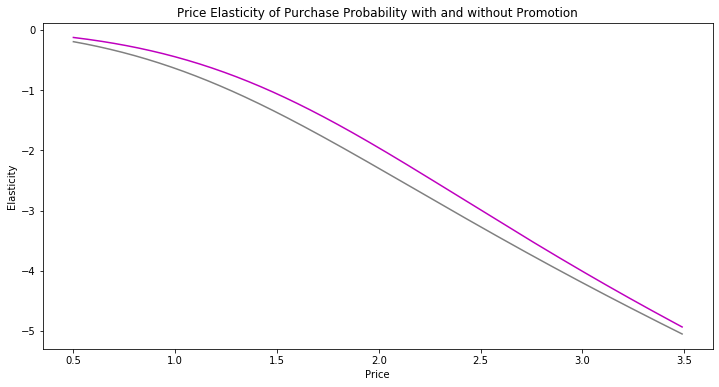

In [58]:
plt.figure(figsize=(12,6))
plt.plot(price_range,pe_promo0,color='grey') #without promotion
plt.plot(price_range,pe_promo,color='m') # with promotion

plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Probability with and without Promotion');

##### From the above comparison between promotion and no-promotion price elasticities, we can see that the promotion curve lies above the no promotion curve at all price points, means at a certain price point with no promotion the price will be elastic but will stand still inelastic with promotion offered, means that customers are less sensitive to price changes with promotion activities. 


##### From the above dataframe we found that at 1.27 USD with no promotion the price is elastic but with promotion is still inelaastic until 1.45 USD it rurns elastic whic made about 20 cents difference. 

##### So obviously it would make sense to change the original price with promotion, better than preserve the original price without providing any promotion. 

## Brand Choice probability Models

In [59]:
# Only incidence happened
brand_choice = df_pa[df_pa['Incidence']==1]

In [60]:
# Defining x,y 
y = brand_choice['Brand']
features = ['Price_1','Price_2','Price_3','Price_4','Price_5']

x = brand_choice[features]


In [61]:
model_brand_choice = LogisticRegression(solver='sag',multi_class='multinomial')

In [62]:
model_brand_choice.fit(x,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)

In [63]:
model_brand_choice.coef_


array([[-3.9159664 ,  0.65845805,  2.41768245,  0.70407624, -0.20212022],
       [ 1.27460642, -1.87985705, -0.21267046, -0.20634511,  0.58786382],
       [ 1.62421676,  0.56211781,  0.50100302,  1.03952993,  0.45282024],
       [ 0.57452923,  0.39558518, -1.40063979, -1.24624916,  0.24934193],
       [ 0.44261397,  0.26369602, -1.30537522, -0.29101191, -1.08790577]])

In [107]:
df_coef = pd.DataFrame(np.transpose(model_brand_choice.coef_))
coefficients  = ['Brand_1_coef','Brand_2_coef','Brand_3_coef','Brand_4_coef','Brand_5_coef']
df_coef.columns = [coefficients]
prices =  ['Price_1','Price_2','Price_3','Price_4','Price_5']
df_coef.index = prices 
df_coef = df_coef.round(2)
df_coef

,Brand_1_coef,Brand_2_coef,Brand_3_coef,Brand_4_coef,Brand_5_coef
Price_1,-3.92,1.27,1.62,0.57,0.44
Price_2,0.66,-1.88,0.56,0.40,0.26
Price_3,2.42,-0.21,0.50,-1.40,-1.31
Price_4,0.70,-0.21,1.04,-1.25,-0.29
Price_5,-0.20,0.59,0.45,0.25,-1.09


##### we can see that the brand_1 coefficient is negative in its own price and poistive for all other brands except brand 5 which means that as price increase the purchase probability for this brand is decreasing, and as the the other brand's price increase the purchase probability of purchasing brand_1 increase except for brand 5, and the higher the coeffiecient of other brand the higher probability of customer to switch to brand_1 for instance .

## Brand 5 Own price Elasticity

In [65]:
df_own_brand_5 = pd.DataFrame(index=np.arange(price_range.size))

In [66]:
df_own_brand_5['Price_1'] = brand_choice['Price_1'].mean()
df_own_brand_5['Price_2'] = brand_choice['Price_2'].mean()
df_own_brand_5['Price_3'] = brand_choice['Price_3'].mean()
df_own_brand_5['Price_4'] = brand_choice['Price_4'].mean()

df_own_brand_5['Price_5'] = price_range

In [67]:
df_own_brand_5

,Price_1,Price_2,Price_3,Price_4,Price_5
0,1.384559,1.764717,2.006694,2.159658,0.50
1,1.384559,1.764717,2.006694,2.159658,0.51
2,1.384559,1.764717,2.006694,2.159658,0.52
3,1.384559,1.764717,2.006694,2.159658,0.53
4,1.384559,1.764717,2.006694,2.159658,0.54
5,1.384559,1.764717,2.006694,2.159658,0.55
6,1.384559,1.764717,2.006694,2.159658,0.56
7,1.384559,1.764717,2.006694,2.159658,0.57
8,1.384559,1.764717,2.006694,2.159658,0.58
9,1.384559,1.764717,2.006694,2.159658,0.59


In [68]:
df_own_brand_5_pred = model_brand_choice.predict_proba(df_own_brand_5)
df_own_brand_5_pred

array([[0.03290758, 0.02177652, 0.00543762, 0.02988826, 0.90999001],
       [0.03316231, 0.02211914, 0.00551572, 0.03025591, 0.90894692],
       [0.03341854, 0.02246683, 0.00559486, 0.03062764, 0.90789214],
       ...,
       [0.06881435, 0.4757032 , 0.07953712, 0.23889343, 0.1370519 ],
       [0.06852873, 0.47748599, 0.07972746, 0.23897837, 0.13527945],
       [0.06824217, 0.47926047, 0.07991576, 0.23905585, 0.13352575]])

In [69]:
df_own_brand_5_prob = df_own_brand_5_pred[:][:,4]


In [37]:
brand_5_coef = df_coef.iloc[4,4]
brand_5_coef

-1.09

In [70]:
# Price Elasticity for brand 5
brand_5_elast = brand_5_coef * price_range * (1-df_own_brand_5_prob)

In [71]:
df_price_elasticities['Brand_5_elast'] = brand_5_elast
pd.options.display.max_rows= None
df_price_elasticities

,Price_point,Mean_pe,Brand_5_elast,elasticity_promotion_1,elasticity_promotion_0
0,0.50,-0.096396,-0.049055,-0.125732,-0.195644
1,0.51,-0.100464,-0.050616,-0.129848,-0.201765
2,0.52,-0.104659,-0.052207,-0.134043,-0.207989
3,0.53,-0.108984,-0.053827,-0.138318,-0.214316
4,0.54,-0.113442,-0.055477,-0.142674,-0.220747
5,0.55,-0.118037,-0.057158,-0.147112,-0.227283
6,0.56,-0.122772,-0.058871,-0.151632,-0.233925
7,0.57,-0.127650,-0.060615,-0.156237,-0.240674
8,0.58,-0.132675,-0.062391,-0.160927,-0.247529
9,0.59,-0.137850,-0.064200,-0.165702,-0.254493


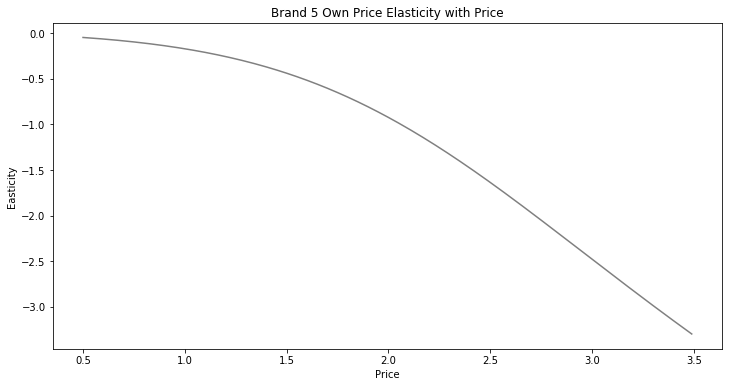

In [86]:
# Plotting own price elasticity for brand 5 
plt.figure(figsize=(12,6))
plt.plot(price_range,brand_5_elast,color='grey') 


plt.xlabel('Price')
plt.ylabel('Easticity')
plt.title('Brand 5 Own Price Elasticity with Price');

##### from that plot we can see that brand 5 is inelastic up to 2.06 price point then it turns elastic slowly

### Brand 4 Own price Elasticity 

In [110]:
df_own_brand_4 = pd.DataFrame(index=np.arange(price_range.size))

In [112]:
df_own_brand_4['Price_1'] = brand_choice['Price_1'].mean()
df_own_brand_4['Price_2'] = brand_choice['Price_2'].mean()
df_own_brand_4['Price_3'] = brand_choice['Price_3'].mean()
df_own_brand_4['Price_4'] = price_range
df_own_brand_4['Price_5'] = brand_choice['Price_5'].mean()
df_own_brand_4.head()

,Price_1,Price_2,Price_3,Price_4,Price_5
0,1.384559,1.764717,2.006694,0.50,2.654296
1,1.384559,1.764717,2.006694,0.51,2.654296
2,1.384559,1.764717,2.006694,0.52,2.654296
3,1.384559,1.764717,2.006694,0.53,2.654296
4,1.384559,1.764717,2.006694,0.54,2.654296


In [116]:
df_own_brand_4_pred = model_brand_choice.predict_proba(df_own_brand_4)
df_own_brand_4_pred

array([[0.00996341, 0.16384098, 0.00386807, 0.6091954 , 0.21313214],
       [0.01011872, 0.16488686, 0.00394156, 0.60674173, 0.21431113],
       [0.01027617, 0.16593495, 0.00401634, 0.60428169, 0.21549086],
       ...,
       [0.22460334, 0.24724048, 0.23615035, 0.04189176, 0.25011406],
       [0.22567141, 0.24616482, 0.23807061, 0.04127801, 0.24881515],
       [0.22673523, 0.24508377, 0.23999661, 0.04067158, 0.24751281]])

In [117]:
df_own_brand_4_prob = df_own_brand_4_prob[:][:,3]

In [120]:
df_coef_brand4 = df_coef.iloc[3,3]
df_coef_brand4

-1.25

In [124]:
own_brand_4_elas = df_coef_brand4 * price_range * (1-df_own_brand_4_prob)

In [129]:
df_price_elasticities['own_brand_4_elasticity'] = own_brand_4_elas

In [130]:
df_price_elasticities

,Price_point,Mean_pe,Brand_5_elast,elasticity_promotion_1,elasticity_promotion_0,Brand_5_cross_Brand_Elast to Brand 4,df_own_brand_4_elasticity,own_brand_4_elasticity
0,0.50,-0.096396,-0.049055,-0.125732,-0.195644,0.332011,-0.244253,-0.244253
1,0.51,-0.100464,-0.050616,-0.129848,-0.201765,0.337288,-0.250702,-0.250702
2,0.52,-0.104659,-0.052207,-0.134043,-0.207989,0.342507,-0.257217,-0.257217
3,0.53,-0.108984,-0.053827,-0.138318,-0.214316,0.347669,-0.263797,-0.263797
4,0.54,-0.113442,-0.055477,-0.142674,-0.220747,0.352773,-0.270444,-0.270444
5,0.55,-0.118037,-0.057158,-0.147112,-0.227283,0.357820,-0.277156,-0.277156
6,0.56,-0.122772,-0.058871,-0.151632,-0.233925,0.362809,-0.283934,-0.283934
7,0.57,-0.127650,-0.060615,-0.156237,-0.240674,0.367741,-0.290779,-0.290779
8,0.58,-0.132675,-0.062391,-0.160927,-0.247529,0.372614,-0.297690,-0.297690
9,0.59,-0.137850,-0.064200,-0.165702,-0.254493,0.377430,-0.304668,-0.304668


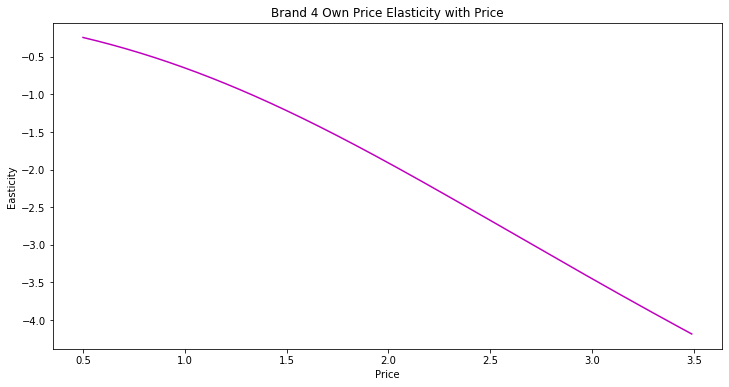

In [127]:
# Plotting own price elasticity for brand 4 
plt.figure(figsize=(12,6))
plt.plot(price_range,own_brand_4_elas,color='m') 


plt.xlabel('Price')
plt.ylabel('Easticity')
plt.title('Brand 4 Own Price Elasticity with Price');

##### Since the minmum price point for brand 4 is 1.76. However, the price elasticity of brand 4 becomes elastic att  1.3 price point which means increasing price for brand 4 is not helpful for the sake of purchase probability for this brand 

In [132]:
brand_choice[['Price_1','Price_2','Price_3','Price_4','Price_5']].describe()

,Price_1,Price_2,Price_3,Price_4,Price_5
count,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000
mean,1.384559,1.764717,2.006694,2.159658,2.654296
std,0.090944,0.181667,0.046200,0.093253,0.097724
min,1.100000,1.260000,1.870000,1.760000,2.110000
25%,1.340000,1.570000,1.970000,2.120000,2.630000
50%,1.390000,1.880000,2.010000,2.180000,2.670000
75%,1.470000,1.890000,2.060000,2.240000,2.700000
max,1.590000,1.900000,2.140000,2.260000,2.800000


In [139]:
df_coef_brand3 = df_coef.iloc[2,2]
df_coef_brand3

0.5

In [136]:
# Own price elasticity for brand 3 
df_own_brand_3 = pd.DataFrame(index=np.arange(price_range.size))
df_own_brand_3['Price_1'] = brand_choice['Price_1'].mean()
df_own_brand_3['Price_2'] = brand_choice['Price_2'].mean()
df_own_brand_3['Price_3'] = price_range
df_own_brand_3['Price_4'] = brand_choice['Price_4'].mean()
df_own_brand_3['Price_5'] = brand_choice['Price_5'].mean()

df_own_brand_3_pred = model_brand_choice.predict_proba(df_own_brand_3)

df_own_brand_3_prob = df_own_brand_3_pred[:][:,2]
df_coef_brand3 = df_coef.iloc[2,2]
df_coef_brand3
own_brand_3_elas = df_coef_brand3 * price_range * (1-df_own_brand_3_prob)
df_price_elasticities['own_brand_3_elasticity'] = own_brand_3_elas
df_price_elasticities

,Price_point,Mean_pe,Brand_5_elast,elasticity_promotion_1,elasticity_promotion_0,Brand_5_cross_Brand_Elast to Brand 4,df_own_brand_4_elasticity,own_brand_4_elasticity,own_brand_3_elasticity
0,0.50,-0.096396,-0.049055,-0.125732,-0.195644,0.332011,-0.244253,-0.244253,0.248539
1,0.51,-0.100464,-0.050616,-0.129848,-0.201765,0.337288,-0.250702,-0.250702,0.253484
2,0.52,-0.104659,-0.052207,-0.134043,-0.207989,0.342507,-0.257217,-0.257217,0.258427
3,0.53,-0.108984,-0.053827,-0.138318,-0.214316,0.347669,-0.263797,-0.263797,0.263369
4,0.54,-0.113442,-0.055477,-0.142674,-0.220747,0.352773,-0.270444,-0.270444,0.268309
5,0.55,-0.118037,-0.057158,-0.147112,-0.227283,0.357820,-0.277156,-0.277156,0.273248
6,0.56,-0.122772,-0.058871,-0.151632,-0.233925,0.362809,-0.283934,-0.283934,0.278185
7,0.57,-0.127650,-0.060615,-0.156237,-0.240674,0.367741,-0.290779,-0.290779,0.283121
8,0.58,-0.132675,-0.062391,-0.160927,-0.247529,0.372614,-0.297690,-0.297690,0.288055
9,0.59,-0.137850,-0.064200,-0.165702,-0.254493,0.377430,-0.304668,-0.304668,0.292987


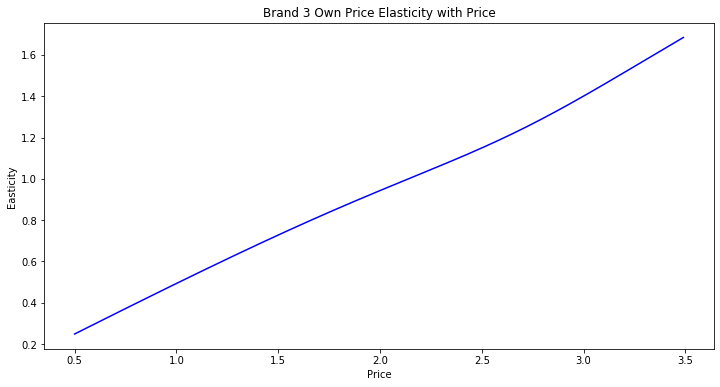

In [137]:
# Plotting own price elasticity for brand 3
plt.figure(figsize=(12,6))
plt.plot(price_range,own_brand_3_elas,color='b') 


plt.xlabel('Price')
plt.ylabel('Easticity')
plt.title('Brand 3 Own Price Elasticity with Price');

###### Intersetingly that brand 3 has a positive coefficient with the price means as the price increases the purchase probability of brand 3 increases as well which not make sense, because from the above chart we can see that the curve become more elastic after 2.14 which is the maximun price for brand 3 so increasing price in range 1.9 to 2.14 is still inelastic and elastic after that price point, so as a recommedndation brand 3 can increase price cautiously and not exceeding the maximum price 

In [140]:
# Own price elasticity for brand 2
df_own_brand_2 = pd.DataFrame(index=np.arange(price_range.size))
df_own_brand_2['Price_1'] = brand_choice['Price_1'].mean()
df_own_brand_2['Price_2'] = price_range
df_own_brand_2['Price_3'] = brand_choice['Price_3'].mean()
df_own_brand_2['Price_4'] = brand_choice['Price_4'].mean()
df_own_brand_2['Price_5'] = brand_choice['Price_5'].mean()
df_own_brand_2.head()
df_own_brand_2_pred = model_brand_choice.predict_proba(df_own_brand_4)

df_own_brand_2_prob = df_own_brand_2_pred[:][:,1]
df_coef_brand2 = df_coef.iloc[1,1]
df_coef_brand2
own_brand_2_elas = df_coef_brand2 * price_range * (1-df_own_brand_2_prob)
df_price_elasticities['own_brand_2_elasticity'] = own_brand_2_elas
df_price_elasticities

,Price_point,Mean_pe,Brand_5_elast,elasticity_promotion_1,elasticity_promotion_0,Brand_5_cross_Brand_Elast to Brand 4,df_own_brand_4_elasticity,own_brand_4_elasticity,own_brand_3_elasticity,own_brand_2_elasticity
0,0.50,-0.096396,-0.049055,-0.125732,-0.195644,0.332011,-0.244253,-0.244253,0.248539,-0.785989
1,0.51,-0.100464,-0.050616,-0.129848,-0.201765,0.337288,-0.250702,-0.250702,0.253484,-0.800706
2,0.52,-0.104659,-0.052207,-0.134043,-0.207989,0.342507,-0.257217,-0.257217,0.258427,-0.815382
3,0.53,-0.108984,-0.053827,-0.138318,-0.214316,0.347669,-0.263797,-0.263797,0.263369,-0.830016
4,0.54,-0.113442,-0.055477,-0.142674,-0.220747,0.352773,-0.270444,-0.270444,0.268309,-0.844608
5,0.55,-0.118037,-0.057158,-0.147112,-0.227283,0.357820,-0.277156,-0.277156,0.273248,-0.859159
6,0.56,-0.122772,-0.058871,-0.151632,-0.233925,0.362809,-0.283934,-0.283934,0.278185,-0.873668
7,0.57,-0.127650,-0.060615,-0.156237,-0.240674,0.367741,-0.290779,-0.290779,0.283121,-0.888135
8,0.58,-0.132675,-0.062391,-0.160927,-0.247529,0.372614,-0.297690,-0.297690,0.288055,-0.902561
9,0.59,-0.137850,-0.064200,-0.165702,-0.254493,0.377430,-0.304668,-0.304668,0.292987,-0.916944


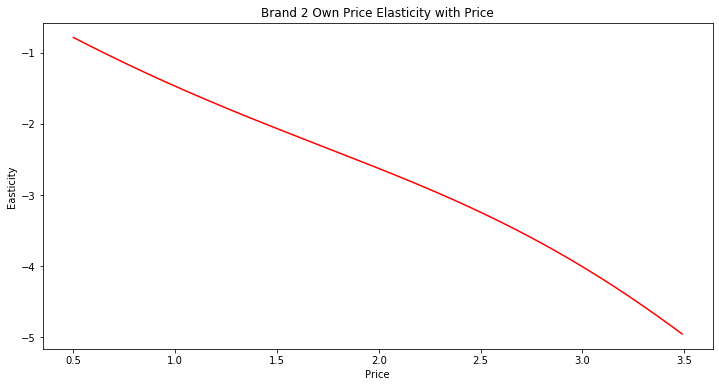

In [141]:
# Plotting own price elasticity for brand 2 
plt.figure(figsize=(12,6))
plt.plot(price_range,own_brand_2_elas,color='r') 


plt.xlabel('Price')
plt.ylabel('Easticity')
plt.title('Brand 2 Own Price Elasticity with Price');

###### The curve become inelastic at 0.65 price point, and since min is 1.2 and max is 1.9 so increasing the price for brand 2 will risk losing  customers.

In [142]:
df_own_brand_1 = pd.DataFrame(index=np.arange(price_range.size))
df_own_brand_1['Price_1'] = price_range
df_own_brand_1['Price_2'] = brand_choice['Price_2'].mean()
df_own_brand_1['Price_3'] = brand_choice['Price_3'].mean()
df_own_brand_1['Price_4'] = brand_choice['Price_4'].mean()
df_own_brand_1['Price_5'] = brand_choice['Price_5'].mean()
df_own_brand_1.head()
df_own_brand_1_pred = model_brand_choice.predict_proba(df_own_brand_1)
df_own_brand_1_pred
df_own_brand_1_prob = df_own_brand_1_pred[:][:,0]
df_coef_brand1 = df_coef.iloc[0,0]
df_coef_brand1
own_brand_1_elas = df_coef_brand1 * price_range * (1-df_own_brand_1_prob)
df_price_elasticities['own_brand_1_elasticity'] = own_brand_1_elas
df_price_elasticities

,Price_point,Mean_pe,Brand_5_elast,elasticity_promotion_1,elasticity_promotion_0,Brand_5_cross_Brand_Elast to Brand 4,df_own_brand_4_elasticity,own_brand_4_elasticity,own_brand_3_elasticity,own_brand_2_elasticity,own_brand_1_elasticity
0,0.50,-0.096396,-0.049055,-0.125732,-0.195644,0.332011,-0.244253,-0.244253,0.248539,-0.785989,-0.290347
1,0.51,-0.100464,-0.050616,-0.129848,-0.201765,0.337288,-0.250702,-0.250702,0.253484,-0.800706,-0.307957
2,0.52,-0.104659,-0.052207,-0.134043,-0.207989,0.342507,-0.257217,-0.257217,0.258427,-0.815382,-0.326424
3,0.53,-0.108984,-0.053827,-0.138318,-0.214316,0.347669,-0.263797,-0.263797,0.263369,-0.830016,-0.345776
4,0.54,-0.113442,-0.055477,-0.142674,-0.220747,0.352773,-0.270444,-0.270444,0.268309,-0.844608,-0.366040
5,0.55,-0.118037,-0.057158,-0.147112,-0.227283,0.357820,-0.277156,-0.277156,0.273248,-0.859159,-0.387246
6,0.56,-0.122772,-0.058871,-0.151632,-0.233925,0.362809,-0.283934,-0.283934,0.278185,-0.873668,-0.409421
7,0.57,-0.127650,-0.060615,-0.156237,-0.240674,0.367741,-0.290779,-0.290779,0.283121,-0.888135,-0.432594
8,0.58,-0.132675,-0.062391,-0.160927,-0.247529,0.372614,-0.297690,-0.297690,0.288055,-0.902561,-0.456790
9,0.59,-0.137850,-0.064200,-0.165702,-0.254493,0.377430,-0.304668,-0.304668,0.292987,-0.916944,-0.482037


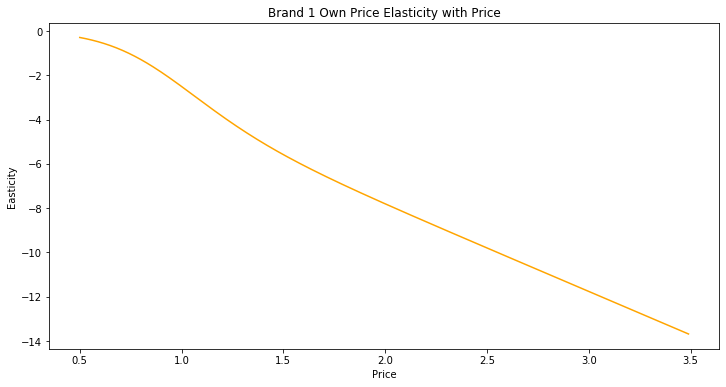

In [143]:
# Plotting own price elasticity for brand 1
plt.figure(figsize=(12,6))
plt.plot(price_range,own_brand_1_elas,color='orange') 


plt.xlabel('Price')
plt.ylabel('Easticity')
plt.title('Brand 1 Own Price Elasticity with Price');

##### The curve starts to become elastic at 0.74, minimum price is 1.1 and maximum 1.6 so increasing price 1% will decrease the purchase probability of brand 1  by 0.3 % 

## Cross ELasticity Brand 4 & 5

In [83]:
df_brand_4_cross_brand_5 = pd.DataFrame(index=np.arange(price_range.size))

In [84]:
df_brand_4_cross_brand_5['Price_1'] = brand_choice['Price_1'].mean()
df_brand_4_cross_brand_5['Price_2'] = brand_choice['Price_2'].mean()
df_brand_4_cross_brand_5['Price_3'] = brand_choice['Price_3'].mean()
df_brand_4_cross_brand_5['Price_4'] = price_range
df_brand_4_cross_brand_5['Price_5'] = brand_choice['Price_5'].mean()

In [85]:
df_brand_4_cross_brand_5

,Price_1,Price_2,Price_3,Price_4,Price_5
0,1.384559,1.764717,2.006694,0.50,2.654296
1,1.384559,1.764717,2.006694,0.51,2.654296
2,1.384559,1.764717,2.006694,0.52,2.654296
3,1.384559,1.764717,2.006694,0.53,2.654296
4,1.384559,1.764717,2.006694,0.54,2.654296
5,1.384559,1.764717,2.006694,0.55,2.654296
6,1.384559,1.764717,2.006694,0.56,2.654296
7,1.384559,1.764717,2.006694,0.57,2.654296
8,1.384559,1.764717,2.006694,0.58,2.654296
9,1.384559,1.764717,2.006694,0.59,2.654296


In [99]:
df_brand_4_cross_brand_5_pred = model_brand_choice.predict_proba(df_brand_4_cross_brand_5)

In [100]:
df_brand_4_cross_brand_5_prob = df_brand_4_cross_brand_5_pred[:][:,3]

In [101]:
df_brand_4_cross_brand_5_elast = -brand_5_coef * price_range * df_brand_4_cross_brand_5_prob

In [102]:
df_price_elasticities['Brand_5_cross_Brand_Elast to Brand 4'] = df_brand_4_cross_brand_5_elast

In [105]:
df_price_elasticities

,Price_point,Mean_pe,Brand_5_elast,elasticity_promotion_1,elasticity_promotion_0,Brand_5_cross_Brand_Elast to Brand 4
0,0.50,-0.096396,-0.049055,-0.125732,-0.195644,0.332011
1,0.51,-0.100464,-0.050616,-0.129848,-0.201765,0.337288
2,0.52,-0.104659,-0.052207,-0.134043,-0.207989,0.342507
3,0.53,-0.108984,-0.053827,-0.138318,-0.214316,0.347669
4,0.54,-0.113442,-0.055477,-0.142674,-0.220747,0.352773
5,0.55,-0.118037,-0.057158,-0.147112,-0.227283,0.357820
6,0.56,-0.122772,-0.058871,-0.151632,-0.233925,0.362809
7,0.57,-0.127650,-0.060615,-0.156237,-0.240674,0.367741
8,0.58,-0.132675,-0.062391,-0.160927,-0.247529,0.372614
9,0.59,-0.137850,-0.064200,-0.165702,-0.254493,0.377430


###### Since price of brand 5 starts from 2.01 so we will compare the elasticities from this point if brand 5 cross brand 4 price elasticity is more the the elasticity of brand 5 in absolute terms so 4 is strong substitute for 5 , so from the upper dataframe wee found that brand 4 is strong substitute for brand 5 until price point 1.65 means that if brand 4 lower oits price to that point will be a strong substitute, but in our case the price of brand 5 statrts from 2 so brand 4 is a weak substitute for brand 5 

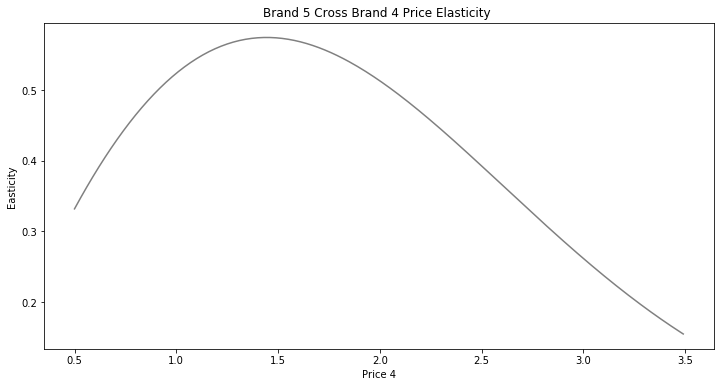

In [98]:
# Plotting own price elasticity for brand 5 Cross Brand 4 
plt.figure(figsize=(12,6))
plt.plot(price_range,df_brand_4_cross_brand_5_elast,color='grey') 


plt.xlabel('Price 4')
plt.ylabel('Easticity')
plt.title('Brand 5 Cross Brand 4 Price Elasticity ');

##### We can see the elasticity is positive, means that as the price of brand 4 increase the purchase probability of brand 5 increase
#### When corss brand elasticity > 0 so the two brands are substitutes 
#### if cross brand elasticity > own brand elasticity so brand 4 is strong substiute

## Cross Price Elasticity Brand 1 & 2


In [146]:
df_brand_1_cross_brand_2 = pd.DataFrame(index=np.arange(price_range.size))

In [147]:
df_brand_1_cross_brand_2['Price_1'] = brand_choice['Price_1'].mean()
df_brand_1_cross_brand_2['Price_2'] = price_range
df_brand_1_cross_brand_2['Price_3'] = brand_choice['Price_3'].mean()
df_brand_1_cross_brand_2['Price_4'] = brand_choice['Price_4'].mean()
df_brand_1_cross_brand_2['Price_5'] = brand_choice['Price_5'].mean()

In [149]:
df_brand_1_cross_brand_2_pred = model_brand_choice.predict_proba(df_brand_1_cross_brand_2)

In [158]:
df_brand_1_cross_brand_2_prob = df_brand_1_cross_brand_2_pred[:][:,1]

In [159]:
coef_1 = df_coef.iloc[0,0]

In [162]:
brand_1_cross_brand_2_elast = -coef_1 * price_range * df_brand_1_cross_brand_2_prob

In [163]:
df_price_elasticities['brand_1_cross_brand_2_elast'] = brand_1_cross_brand_2_elast

In [166]:
df_price_elasticities

,Price_point,Mean_pe,Brand_5_elast,elasticity_promotion_1,elasticity_promotion_0,Brand_5_cross_Brand_Elast to Brand 4,df_own_brand_4_elasticity,own_brand_4_elasticity,own_brand_3_elasticity,own_brand_2_elasticity,own_brand_1_elasticity,brand_1_cross_brand_2_elast
0,0.50,-0.096396,-0.049055,-0.125732,-0.195644,0.332011,-0.244253,-0.244253,0.248539,-0.785989,-0.290347,1.731455
1,0.51,-0.100464,-0.050616,-0.129848,-0.201765,0.337288,-0.250702,-0.250702,0.253484,-0.800706,-0.307957,1.761445
2,0.52,-0.104659,-0.052207,-0.134043,-0.207989,0.342507,-0.257217,-0.257217,0.258427,-0.815382,-0.326424,1.791172
3,0.53,-0.108984,-0.053827,-0.138318,-0.214316,0.347669,-0.263797,-0.263797,0.263369,-0.830016,-0.345776,1.820630
4,0.54,-0.113442,-0.055477,-0.142674,-0.220747,0.352773,-0.270444,-0.270444,0.268309,-0.844608,-0.366040,1.849814
5,0.55,-0.118037,-0.057158,-0.147112,-0.227283,0.357820,-0.277156,-0.277156,0.273248,-0.859159,-0.387246,1.878716
6,0.56,-0.122772,-0.058871,-0.151632,-0.233925,0.362809,-0.283934,-0.283934,0.278185,-0.873668,-0.409421,1.907333
7,0.57,-0.127650,-0.060615,-0.156237,-0.240674,0.367741,-0.290779,-0.290779,0.283121,-0.888135,-0.432594,1.935657
8,0.58,-0.132675,-0.062391,-0.160927,-0.247529,0.372614,-0.297690,-0.297690,0.288055,-0.902561,-0.456790,1.963683
9,0.59,-0.137850,-0.064200,-0.165702,-0.254493,0.377430,-0.304668,-0.304668,0.292987,-0.916944,-0.482037,1.991406


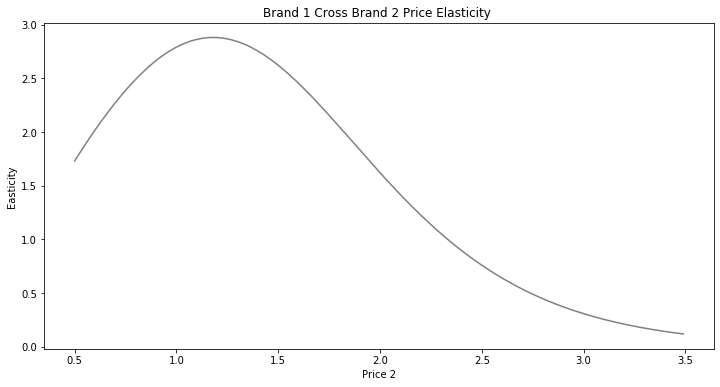

In [165]:
# Plotting brand 1 own price elasticity for brand 2 cross price 
plt.figure(figsize=(12,6))
plt.plot(price_range,brand_1_cross_brand_2_elast,color='grey') 


plt.xlabel('Price 2')
plt.ylabel('Easticity')
plt.title('Brand 1 Cross Brand 2 Price Elasticity ');

#### since brand 1 price starts from 1.1, so brand 2 is not a strong substitute for brand 1, but is a strong substitute for brand 1 until 1 Price point 

##### If brand 2 decreases its price 1% the purchase probability of brand 1 will decrease 2.8%, but if brand 1 decreases its price 1% the purchase probability will increase about 3.3% which 0.5 revenue difference.

In [167]:
brand_choice[['Price_1','Price_2','Price_3','Price_4','Price_5']].describe()

,Price_1,Price_2,Price_3,Price_4,Price_5
count,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000
mean,1.384559,1.764717,2.006694,2.159658,2.654296
std,0.090944,0.181667,0.046200,0.093253,0.097724
min,1.100000,1.260000,1.870000,1.760000,2.110000
25%,1.340000,1.570000,1.970000,2.120000,2.630000
50%,1.390000,1.880000,2.010000,2.180000,2.670000
75%,1.470000,1.890000,2.060000,2.240000,2.700000
max,1.590000,1.900000,2.140000,2.260000,2.800000


### Brand Choice By segment - Well Off

In [96]:
df_pa.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Age,Education,Income,Occupation,Settlement size,segment,segment_0,segment_1,segment_2,segment_3
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,...,47,1,110866,1,0,1,0,1,0,0
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,...,47,1,110866,1,0,1,0,1,0,0
2,200000001,12,0,0,0,0,0,1.51,1.89,1.99,...,47,1,110866,1,0,1,0,1,0,0
3,200000001,16,0,0,0,0,0,1.52,1.89,1.98,...,47,1,110866,1,0,1,0,1,0,0
4,200000001,18,0,0,0,0,0,1.52,1.89,1.99,...,47,1,110866,1,0,1,0,1,0,0


In [255]:
brand_choice_s0 = df_pa[df_pa['Incidence']==1]
brand_choice_s0 = brand_choice_s0[brand_choice_s0['segment']==0]
brand_choice_s0.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,Price_4,Price_5,Promotion_1,Promotion_2,Promotion_3,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,segment,segment_0,segment_1,segment_2,segment_3
101,200000002,6,1,4,1,0,0,1.59,1.87,2.01,2.09,2.66,0,0,0,0,0,1,1,52,2,159052,2,1,0,1,0,0,0
115,200000002,100,1,4,2,0,0,1.47,1.90,1.95,2.12,2.67,0,0,0,1,0,1,1,52,2,159052,2,1,0,1,0,0,0
138,200000002,283,1,4,3,0,0,1.37,1.89,2.00,2.14,2.64,0,0,0,0,0,1,1,52,2,159052,2,1,0,1,0,0,0
141,200000002,307,1,4,1,0,0,1.34,1.89,2.01,2.03,2.68,1,0,0,1,0,1,1,52,2,159052,2,1,0,1,0,0,0
153,200000002,422,1,4,1,0,0,1.34,1.89,2.02,2.21,2.65,0,0,0,1,0,1,1,52,2,159052,2,1,0,1,0,0,0


In [256]:
y = brand_choice_s0['Brand']
brand_choice_s0 = pd.get_dummies(brand_choice_s0,columns=['Brand'],prefix='Brand',prefix_sep = '_')
x = brand_choice_s0[features]

In [257]:
brand_choice_model_s0 = LogisticRegression(solver='sag',multi_class='multinomial',max_iter=300)
brand_choice_model_s0.fit(x,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=300,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)

In [258]:
brand_choice_model_s0.coef_

array([[-2.15149768, -0.95869283,  2.00749563,  2.52408833, -0.99387149],
       [ 1.32630822, -1.38100391, -1.65156319,  0.95754474, -0.29972068],
       [ 0.81775936,  1.28819089, -0.4912015 , -0.25442883,  1.17337358],
       [ 0.11677161,  0.77952102,  0.02853475, -1.89617993,  0.56321778],
       [-0.10934151,  0.27198482,  0.10673431, -1.33102431, -0.44299918]])

In [259]:
# Coefficients Table for segment 0 (well_off)
df_coef_s0 = pd.DataFrame(np.transpose(brand_choice_model_s0.coef_))
coefficients  = ['Brand_1','Brand_2','Brand_3','Brand_4','Brand_5']
df_coef_s0.columns = [coefficients]
prices =  ['Price_1','Price_2','Price_3','Price_4','Price_5']
df_coef_s0.index = prices 
df_coef_s0 = df_coef_s0.round(2)
df_coef_s0


,Brand_1,Brand_2,Brand_3,Brand_4,Brand_5
Price_1,-2.15,1.33,0.82,0.12,-0.11
Price_2,-0.96,-1.38,1.29,0.78,0.27
Price_3,2.01,-1.65,-0.49,0.03,0.11
Price_4,2.52,0.96,-0.25,-1.90,-1.33
Price_5,-0.99,-0.30,1.17,0.56,-0.44


### Own Price Elasticity

In [260]:
df_own_brand_5_s0 = pd.DataFrame(index=np.arange(price_range.size))

In [261]:
df_own_brand_5_s0['Price_1'] = brand_choice_s0['Price_1'].mean()
df_own_brand_5_s0['Price_2'] = brand_choice_s0['Price_2'].mean()
df_own_brand_5_s0['Price_3'] = brand_choice_s0['Price_3'].mean()
df_own_brand_5_s0['Price_4'] = brand_choice_s0['Price_4'].mean()
df_own_brand_5_s0['Price_5'] = price_range
df_own_brand_5_s0.head()

,Price_1,Price_2,Price_3,Price_4,Price_5
0,1.388582,1.779104,2.004471,2.15629,0.50
1,1.388582,1.779104,2.004471,2.15629,0.51
2,1.388582,1.779104,2.004471,2.15629,0.52
3,1.388582,1.779104,2.004471,2.15629,0.53
4,1.388582,1.779104,2.004471,2.15629,0.54


In [262]:
df_own_brand_5_s0_pred =brand_choice_model_s0.predict_proba(df_own_brand_5_s0)

In [263]:
df_own_brand_5_s0_prob = df_own_brand_5_s0_pred[:][:,4]

In [264]:
coef_brand_5_seg0 = df_coef_s0.iloc[4,4]
coef_brand_5_seg0

-0.44

In [265]:
own_price_elst_s0 = coef_brand_5_seg0 * price_range * (1-df_own_brand_5_s0_prob)
df_price_elasticities['brand_5_s0'] = own_price_elst_s0
df_price_elasticities.head()

,Price_point,Mean_pe,Brand_5_elast,elasticity_promotion_1,elasticity_promotion_0,Brand_5_cross_Brand_Elast to Brand 4,df_own_brand_4_elasticity,own_brand_4_elasticity,own_brand_3_elasticity,own_brand_2_elasticity,own_brand_1_elasticity,brand_1_cross_brand_2_elast,brand_5_s3,cross_brand_5_brand_4_s3_elast,brand_5_s1,brand_5_s4,cross_brand_5_brand_4_s2_elast,brand_5_s2,brand_5_s0
0,0.50,-0.096396,-0.049055,-0.125732,-0.195644,0.332011,-0.244253,-0.244253,0.248539,-0.785989,-0.290347,1.731455,-0.022172,0.098279,-0.002780,-0.122702,0.169321,-0.122702,-0.120032
1,0.51,-0.100464,-0.050616,-0.129848,-0.201765,0.337288,-0.250702,-0.250702,0.253484,-0.800706,-0.307957,1.761445,-0.022720,0.099533,-0.002946,-0.125918,0.171379,-0.125918,-0.122472
2,0.52,-0.104659,-0.052207,-0.134043,-0.207989,0.342507,-0.257217,-0.257217,0.258427,-0.815382,-0.326424,1.791172,-0.023273,0.100760,-0.003119,-0.129172,0.173388,-0.129172,-0.124917
3,0.53,-0.108984,-0.053827,-0.138318,-0.214316,0.347669,-0.263797,-0.263797,0.263369,-0.830016,-0.345776,1.820630,-0.023831,0.101963,-0.003302,-0.132462,0.175351,-0.132462,-0.127366
4,0.54,-0.113442,-0.055477,-0.142674,-0.220747,0.352773,-0.270444,-0.270444,0.268309,-0.844608,-0.366040,1.849814,-0.024394,0.103139,-0.003495,-0.135790,0.177266,-0.135790,-0.129820


### Cross Price Elasticity Brand 4 & 5 

In [266]:
df_cross_brand_5_brand_4_s0 = pd.DataFrame(index=np.arange(price_range.size))

In [267]:
df_cross_brand_5_brand_4_s0['Price_1'] = brand_choice_s0['Price_1'].mean()
df_cross_brand_5_brand_4_s0['Price_2'] = brand_choice_s0['Price_2'].mean()
df_cross_brand_5_brand_4_s0['Price_3'] = brand_choice_s0['Price_3'].mean()
df_cross_brand_5_brand_4_s0['Price_4'] = price_range
df_cross_brand_5_brand_4_s0['Price_5'] = brand_choice_s0['Price_5'].mean()
df_cross_brand_5_brand_4_s0.head()

,Price_1,Price_2,Price_3,Price_4,Price_5
0,1.388582,1.779104,2.004471,0.50,2.654471
1,1.388582,1.779104,2.004471,0.51,2.654471
2,1.388582,1.779104,2.004471,0.52,2.654471
3,1.388582,1.779104,2.004471,0.53,2.654471
4,1.388582,1.779104,2.004471,0.54,2.654471


In [268]:
df_cross_brand_4_brand_5_pred = brand_choice_model_s0.predict_proba(df_cross_brand_5_brand_4_s0)

In [270]:
df_cross_brand_4_brand_5_prob = df_cross_brand_4_brand_5_pred[:][:,3]

In [272]:
df_cross_brand_4_brand_5_elast_s0 = -coef_brand_5_seg0 * price_range * df_cross_brand_4_brand_5_prob
df_price_elasticities['cross_brand4_Brand5_elasticity_s0'] =  df_cross_brand_4_brand_5_elast_s0
df_price_elasticities.head()

,Price_point,Mean_pe,Brand_5_elast,elasticity_promotion_1,elasticity_promotion_0,Brand_5_cross_Brand_Elast to Brand 4,df_own_brand_4_elasticity,own_brand_4_elasticity,own_brand_3_elasticity,own_brand_2_elasticity,own_brand_1_elasticity,brand_1_cross_brand_2_elast,brand_5_s3,cross_brand_5_brand_4_s3_elast,brand_5_s1,brand_5_s4,cross_brand_5_brand_4_s2_elast,brand_5_s2,brand_5_s0,cross_brand4_Brand5_elasticity_s0
0,0.50,-0.096396,-0.049055,-0.125732,-0.195644,0.332011,-0.244253,-0.244253,0.248539,-0.785989,-0.290347,1.731455,-0.022172,0.098279,-0.002780,-0.122702,0.169321,-0.122702,-0.120032,0.194739
1,0.51,-0.100464,-0.050616,-0.129848,-0.201765,0.337288,-0.250702,-0.250702,0.253484,-0.800706,-0.307957,1.761445,-0.022720,0.099533,-0.002946,-0.125918,0.171379,-0.125918,-0.122472,0.198495
2,0.52,-0.104659,-0.052207,-0.134043,-0.207989,0.342507,-0.257217,-0.257217,0.258427,-0.815382,-0.326424,1.791172,-0.023273,0.100760,-0.003119,-0.129172,0.173388,-0.129172,-0.124917,0.202245
3,0.53,-0.108984,-0.053827,-0.138318,-0.214316,0.347669,-0.263797,-0.263797,0.263369,-0.830016,-0.345776,1.820630,-0.023831,0.101963,-0.003302,-0.132462,0.175351,-0.132462,-0.127366,0.205989
4,0.54,-0.113442,-0.055477,-0.142674,-0.220747,0.352773,-0.270444,-0.270444,0.268309,-0.844608,-0.366040,1.849814,-0.024394,0.103139,-0.003495,-0.135790,0.177266,-0.135790,-0.129820,0.209726


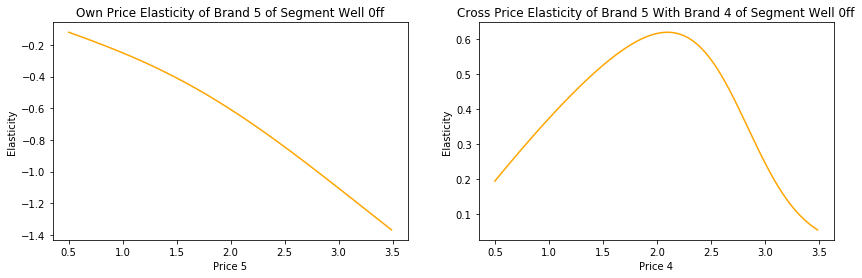

In [162]:
fig, axs = plt.subplots(1,2,figsize=(14,4))
axs[0].plot(price_range,own_price_elst_s0,color='orange')
axs[0].set_title('Own Price Elasticity of Brand 5 of Segment Well 0ff')
axs[0].set_xlabel('Price 5')
axs[1].plot(price_range,df_cross_brand_4_brand_5_elast,color='orange')
axs[1].set_title('Cross Price Elasticity of Brand 5 With Brand 4 of Segment Well 0ff')
axs[1].set_xlabel('Price 4')

for ax in axs.flat:
    ax.set_ylabel('Elasticity');

#### If brand 4 decreases the price 1%, our purchase probability of brand 5 will decrease by 1.5%, but on the other hand if we decreased our brand 5 price by 1%, our ourchase probability will increase by 2%, net result will be 0.5%.
#### 2x = 1.5%

## Brand Choice probability by Segment career_focused

In [106]:
df_pa.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,Price_4,Price_5,Promotion_1,Promotion_2,Promotion_3,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,segment,segment_0,segment_1,segment_2,segment_3
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,2.09,2.66,0,1,0,0,0,0,0,47,1,110866,1,0,1,0,1,0,0
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,2.09,2.66,0,0,0,0,0,0,0,47,1,110866,1,0,1,0,1,0,0
2,200000001,12,0,0,0,0,0,1.51,1.89,1.99,2.09,2.66,0,0,0,0,0,0,0,47,1,110866,1,0,1,0,1,0,0
3,200000001,16,0,0,0,0,0,1.52,1.89,1.98,2.09,2.66,0,0,0,0,0,0,0,47,1,110866,1,0,1,0,1,0,0
4,200000001,18,0,0,0,0,0,1.52,1.89,1.99,2.09,2.66,0,0,0,0,0,0,0,47,1,110866,1,0,1,0,1,0,0


In [187]:
df_brand_choice_carer = df_pa[df_pa['Incidence'] == 1]
# df_brand_choice_carer = pd.get_dummies(df_brand_choice_carer,columns=['Brand'],prefix='Brand',prefix_sep = '_')
df_brand_choice_carer = df_brand_choice_carer[df_brand_choice_carer['segment'] == 3]

In [188]:
df_brand_choice_carer.head(10)

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,Price_4,Price_5,Promotion_1,Promotion_2,Promotion_3,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,segment,segment_0,segment_1,segment_2,segment_3
376,200000005,51,1,5,1,0,0,1.35,1.87,1.93,2.09,2.59,1,1,1,0,0,0,0,49,1,121466,1,2,3,0,0,0,1
377,200000005,57,1,5,1,5,1,1.39,1.90,1.91,2.12,2.62,1,0,0,0,0,0,0,49,1,121466,1,2,3,0,0,0,1
394,200000005,159,1,5,2,0,0,1.39,1.90,1.94,2.16,2.62,1,0,0,0,0,0,0,49,1,121466,1,2,3,0,0,0,1
396,200000005,178,1,5,3,0,0,1.48,1.50,1.99,2.16,2.49,0,0,0,1,1,0,0,49,1,121466,1,2,3,0,0,0,1
410,200000005,249,1,5,1,0,0,1.46,1.89,1.99,2.15,2.65,0,0,0,0,0,0,0,49,1,121466,1,2,3,0,0,0,1
419,200000005,324,1,5,2,0,0,1.33,1.89,1.98,2.21,2.70,0,0,0,1,0,0,0,49,1,121466,1,2,3,0,0,0,1
424,200000005,352,1,5,1,0,0,1.23,1.81,1.97,2.21,2.66,1,1,0,0,0,0,0,49,1,121466,1,2,3,0,0,0,1
430,200000005,384,1,5,1,0,0,1.23,1.87,2.02,2.21,2.71,0,0,0,0,0,0,0,49,1,121466,1,2,3,0,0,0,1
446,200000005,505,1,5,2,0,0,1.21,1.89,2.07,2.21,2.49,0,0,0,0,0,0,0,49,1,121466,1,2,3,0,0,0,1
449,200000005,525,1,5,2,0,0,1.35,1.89,2.07,2.26,2.63,1,0,0,0,0,0,0,49,1,121466,1,2,3,0,0,0,1


In [190]:
# defining x and y for logistic regression model 
y = df_brand_choice_carer['Brand']
features = ['Price_1','Price_2','Price_3','Price_4','Price_5']
x = df_brand_choice_carer[features]

In [191]:
brand_choice_model_s3 = LogisticRegression(solver='sag',multi_class='multinomial',max_iter=300)
brand_choice_model_s3.fit(x,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=300,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)

In [193]:
df_coef_s3= brand_choice_model_s3.coef_

In [194]:
df_coef_s3 = pd.DataFrame(np.transpose(df_coef_s3))

In [197]:
coefficients  = ['Brand_1','Brand_2','Brand_3','Brand_4','Brand_5']
df_coef_s3.columns = [coefficients]
prices =  ['Price_1','Price_2','Price_3','Price_4','Price_5']
df_coef_s3.index = prices 
df_coef_s3 = df_coef_s3.round(2)
df_coef_s3

,Brand_1,Brand_2,Brand_3,Brand_4,Brand_5
Price_1,-2.38,1.13,1.39,-0.02,-0.11
Price_2,0.73,-1.65,0.05,0.40,0.47
Price_3,1.17,0.21,0.46,-1.71,-0.13
Price_4,0.03,0.65,0.41,-1.08,-0.01
Price_5,-0.00,-0.20,0.34,0.42,-0.55


In [200]:
df_own_brand_5_s3 = pd.DataFrame(index=np.arange(price_range.size))
df_own_brand_5_s3['Price_1'] = df_brand_choice_carer['Price_1'].mean()
df_own_brand_5_s3['Price_2'] = df_brand_choice_carer['Price_2'].mean()
df_own_brand_5_s3['Price_3'] = df_brand_choice_carer['Price_3'].mean()
df_own_brand_5_s3['Price_4'] = df_brand_choice_carer['Price_4'].mean()
df_own_brand_5_s3['Price_5'] = price_range
df_own_brand_5_s3.head()

,Price_1,Price_2,Price_3,Price_4,Price_5
0,1.386222,1.774752,2.005519,2.158767,0.50
1,1.386222,1.774752,2.005519,2.158767,0.51
2,1.386222,1.774752,2.005519,2.158767,0.52
3,1.386222,1.774752,2.005519,2.158767,0.53
4,1.386222,1.774752,2.005519,2.158767,0.54


In [201]:
df_own_brand_5_s3_pred = brand_choice_model_s3.predict_proba(df_own_brand_5_s3)

In [202]:
df_own_brand_5_s3_prob = df_own_brand_5_s3_pred[:][:,4]

In [206]:
df_coef_brnd5_s3 = df_coef_s3.iloc[4,4]
df_coef_brnd5_s3

-0.55

In [207]:
own_brand_5_s3_elast =  df_coef_brnd5_s3 * price_range *(1-df_own_brand_5_s3_prob)

In [208]:
df_price_elasticities['brand_5_s3'] =own_brand_5_s3_elast

### Cross Price Elasticities 5 & 4 

In [211]:
df_cross_brand_5_brand_4_s3 = pd.DataFrame(index=np.arange(price_range.size))
df_cross_brand_5_brand_4_s3['Price_1'] = df_brand_choice_carer['Price_1'].mean()
df_cross_brand_5_brand_4_s3['Price_2'] = df_brand_choice_carer['Price_2'].mean()
df_cross_brand_5_brand_4_s3['Price_3'] = df_brand_choice_carer['Price_3'].mean()
df_cross_brand_5_brand_4_s3['Price_4'] = price_range
df_cross_brand_5_brand_4_s3['Price_5'] = df_brand_choice_carer['Price_5'].mean()
df_cross_brand_5_brand_4_s3.head()

,Price_1,Price_2,Price_3,Price_4,Price_5
0,1.386222,1.774752,2.005519,0.50,2.651093
1,1.386222,1.774752,2.005519,0.51,2.651093
2,1.386222,1.774752,2.005519,0.52,2.651093
3,1.386222,1.774752,2.005519,0.53,2.651093
4,1.386222,1.774752,2.005519,0.54,2.651093


In [212]:
cross_brand_5_brand_4_s3_pred =  brand_choice_model_s3.predict_proba(df_cross_brand_5_brand_4_s3)

In [214]:
cross_brand_5_brand_4_s3_prob = cross_brand_5_brand_4_s3_pred[:][:,3]

In [215]:
cross_brand_5_brand_4_s3_elas = -df_coef_brnd5_s3 * price_range * cross_brand_5_brand_4_s3_prob

In [216]:
df_price_elasticities['cross_brand_5_brand_4_s3_elast'] = cross_brand_5_brand_4_s3_elas

In [219]:
df_price_elasticities

,Price_point,Mean_pe,Brand_5_elast,elasticity_promotion_1,elasticity_promotion_0,Brand_5_cross_Brand_Elast to Brand 4,df_own_brand_4_elasticity,own_brand_4_elasticity,own_brand_3_elasticity,own_brand_2_elasticity,own_brand_1_elasticity,brand_1_cross_brand_2_elast,brand_5_s3,cross_brand_5_brand_4_s3_elast
0,0.50,-0.096396,-0.049055,-0.125732,-0.195644,0.332011,-0.244253,-0.244253,0.248539,-0.785989,-0.290347,1.731455,-0.022172,0.098279
1,0.51,-0.100464,-0.050616,-0.129848,-0.201765,0.337288,-0.250702,-0.250702,0.253484,-0.800706,-0.307957,1.761445,-0.022720,0.099533
2,0.52,-0.104659,-0.052207,-0.134043,-0.207989,0.342507,-0.257217,-0.257217,0.258427,-0.815382,-0.326424,1.791172,-0.023273,0.100760
3,0.53,-0.108984,-0.053827,-0.138318,-0.214316,0.347669,-0.263797,-0.263797,0.263369,-0.830016,-0.345776,1.820630,-0.023831,0.101963
4,0.54,-0.113442,-0.055477,-0.142674,-0.220747,0.352773,-0.270444,-0.270444,0.268309,-0.844608,-0.366040,1.849814,-0.024394,0.103139
5,0.55,-0.118037,-0.057158,-0.147112,-0.227283,0.357820,-0.277156,-0.277156,0.273248,-0.859159,-0.387246,1.878716,-0.024961,0.104291
6,0.56,-0.122772,-0.058871,-0.151632,-0.233925,0.362809,-0.283934,-0.283934,0.278185,-0.873668,-0.409421,1.907333,-0.025533,0.105417
7,0.57,-0.127650,-0.060615,-0.156237,-0.240674,0.367741,-0.290779,-0.290779,0.283121,-0.888135,-0.432594,1.935657,-0.026110,0.106519
8,0.58,-0.132675,-0.062391,-0.160927,-0.247529,0.372614,-0.297690,-0.297690,0.288055,-0.902561,-0.456790,1.963683,-0.026692,0.107596
9,0.59,-0.137850,-0.064200,-0.165702,-0.254493,0.377430,-0.304668,-0.304668,0.292987,-0.916944,-0.482037,1.991406,-0.027279,0.108648


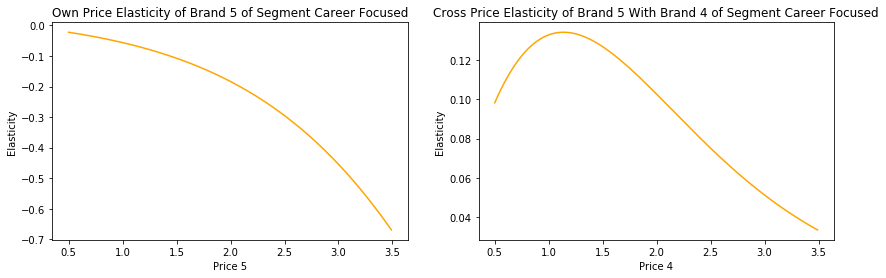

In [218]:
fig, axs = plt.subplots(1,2,figsize=(14,4))
axs[0].plot(price_range,own_brand_5_s3_elast,color='orange')
axs[0].set_title('Own Price Elasticity of Brand 5 of Segment Career Focused')
axs[0].set_xlabel('Price 5')
axs[1].plot(price_range,cross_brand_5_brand_4_s3_elas,color='orange')
axs[1].set_title('Cross Price Elasticity of Brand 5 With Brand 4 of Segment Career Focused')
axs[1].set_xlabel('Price 4')

for ax in axs.flat:
    ax.set_ylabel('Elasticity');

###### career focused segment as we discussed before the highest perecntage preferred Brand 5 so with brand 5 price as we can see from the first curve its inelastic along most of the price points and for career focused segment brand 4 is a weak substitude for brand 5

### Brand Choice Probability for Fewer Opportunity segment 

In [220]:
df_brand_choice_few = df_pa[df_pa['Incidence'] == 1]
# df_brand_choice_carer = pd.get_dummies(df_brand_choice_carer,columns=['Brand'],prefix='Brand',prefix_sep = '_')
df_brand_choice_few = df_brand_choice_few[df_brand_choice_few['segment'] == 1]

y = df_brand_choice_few['Brand']
features = ['Price_1','Price_2','Price_3','Price_4','Price_5']
x = df_brand_choice_few[features]

brand_choice_model_s1 = LogisticRegression(solver='sag',multi_class='multinomial',max_iter=300)
brand_choice_model_s1.fit(x,y)

df_coef_s1= brand_choice_model_s1.coef_
df_coef_s1 = pd.DataFrame(np.transpose(df_coef_s1))
coefficients  = ['Brand_1','Brand_2','Brand_3','Brand_4','Brand_5']
df_coef_s1.columns = [coefficients]
prices =  ['Price_1','Price_2','Price_3','Price_4','Price_5']
df_coef_s1.index = prices 
df_coef_s1 = df_coef_s1.round(2)
df_coef_s1

df_own_brand_5_s1 = pd.DataFrame(index=np.arange(price_range.size))
df_own_brand_5_s1['Price_1'] = df_brand_choice_few['Price_1'].mean()
df_own_brand_5_s1['Price_2'] = df_brand_choice_few['Price_2'].mean()
df_own_brand_5_s1['Price_3'] = df_brand_choice_few['Price_3'].mean()
df_own_brand_5_s1['Price_4'] = df_brand_choice_few['Price_4'].mean()
df_own_brand_5_s1['Price_5'] = price_range
df_own_brand_5_s1.head()

,Price_1,Price_2,Price_3,Price_4,Price_5
0,1.381391,1.741435,2.008513,2.160966,0.50
1,1.381391,1.741435,2.008513,2.160966,0.51
2,1.381391,1.741435,2.008513,2.160966,0.52
3,1.381391,1.741435,2.008513,2.160966,0.53
4,1.381391,1.741435,2.008513,2.160966,0.54


In [223]:
df_own_brand_5_s1_pred = brand_choice_model_s1.predict_proba(df_own_brand_5_s1)
df_own_brand_5_s1_prob = df_own_brand_5_s1_pred[:][:,4]
df_coef_brnd5_s1 = df_coef_s1.iloc[4,4]
df_coef_brnd5_s1
own_brand_5_s1_elast =  df_coef_brnd5_s1 * price_range *(1-df_own_brand_5_s1_prob)
df_price_elasticities['brand_5_s1'] =own_brand_5_s1_elast

In [224]:
df_cross_brand_5_brand_4_s1 = pd.DataFrame(index=np.arange(price_range.size))
df_cross_brand_5_brand_4_s1['Price_1'] = df_brand_choice_few['Price_1'].mean()
df_cross_brand_5_brand_4_s1['Price_2'] = df_brand_choice_few['Price_2'].mean()
df_cross_brand_5_brand_4_s1['Price_3'] = df_brand_choice_few['Price_3'].mean()
df_cross_brand_5_brand_4_s1['Price_4'] = price_range
df_cross_brand_5_brand_4_s1['Price_5'] = df_brand_choice_few['Price_5'].mean()
df_cross_brand_5_brand_4_s1.head()

,Price_1,Price_2,Price_3,Price_4,Price_5
0,1.381391,1.741435,2.008513,0.50,2.655967
1,1.381391,1.741435,2.008513,0.51,2.655967
2,1.381391,1.741435,2.008513,0.52,2.655967
3,1.381391,1.741435,2.008513,0.53,2.655967
4,1.381391,1.741435,2.008513,0.54,2.655967


In [225]:
cross_brand_5_brand_4_s1_pred =  brand_choice_model_s1.predict_proba(df_cross_brand_5_brand_4_s1)
cross_brand_5_brand_4_s1_prob = cross_brand_5_brand_4_s1_pred[:][:,3]
cross_brand_5_brand_4_s1_elas = -df_coef_brnd5_s1 * price_range * cross_brand_5_brand_4_s1_prob
df_price_elasticities['cross_brand_5_brand_4_s1_elast'] = cross_brand_5_brand_4_s1_elas

### Brand Choice Probability for Standard Segment 

In [235]:
df_brand_choice_stand = df_pa[df_pa['Incidence'] == 1]
# df_brand_choice_carer = pd.get_dummies(df_brand_choice_carer,columns=['Brand'],prefix='Brand',prefix_sep = '_')
df_brand_choice_stand = df_brand_choice_stand[df_brand_choice_stand['segment'] == 2]

y = df_brand_choice_stand['Brand']
features = ['Price_1','Price_2','Price_3','Price_4','Price_5']
x = df_brand_choice_stand[features]

brand_choice_model_s2 = LogisticRegression(solver='sag',multi_class='multinomial',max_iter=300)
brand_choice_model_s2.fit(x,y)

df_coef_s2= brand_choice_model_s2.coef_
df_coef_s2 = pd.DataFrame(np.transpose(df_coef_s2))
coefficients  = ['Brand_1','Brand_2','Brand_3','Brand_4','Brand_5']
df_coef_s2.columns = [coefficients]
prices =  ['Price_1','Price_2','Price_3','Price_4','Price_5']
df_coef_s2.index = prices 
df_coef_s2 = df_coef_s2.round(2)
df_coef_s2

df_own_brand_5_s2 = pd.DataFrame(index=np.arange(price_range.size))
df_own_brand_5_s2['Price_1'] = df_brand_choice_stand['Price_1'].mean()
df_own_brand_5_s2['Price_2'] = df_brand_choice_stand['Price_2'].mean()
df_own_brand_5_s2['Price_3'] = df_brand_choice_stand['Price_3'].mean()
df_own_brand_5_s2['Price_4'] = df_brand_choice_stand['Price_4'].mean()
df_own_brand_5_s2['Price_5'] = price_range
df_own_brand_5_s2.head()

,Price_1,Price_2,Price_3,Price_4,Price_5
0,1.381709,1.767435,2.008586,2.163425,0.50
1,1.381709,1.767435,2.008586,2.163425,0.51
2,1.381709,1.767435,2.008586,2.163425,0.52
3,1.381709,1.767435,2.008586,2.163425,0.53
4,1.381709,1.767435,2.008586,2.163425,0.54


In [248]:
df_own_brand_5_s2_pred = brand_choice_model_s2.predict_proba(df_own_brand_5_s2)
df_own_brand_5_s2_prob = df_own_brand_5_s2_pred[:][:,4]
df_coef_brnd5_s2 = df_coef_s2.iloc[4,4]

own_brand_5_s2_elast =  df_coef_brnd5_s2 * price_range *(1-df_own_brand_5_s2_prob)
df_price_elasticities['brand_5_s2'] =own_brand_5_s2_elast

In [249]:
df_cross_brand_5_brand_4_s2 = pd.DataFrame(index=np.arange(price_range.size))
df_cross_brand_5_brand_4_s2['Price_1'] = df_brand_choice_stand['Price_1'].mean()
df_cross_brand_5_brand_4_s2['Price_2'] = df_brand_choice_stand['Price_2'].mean()
df_cross_brand_5_brand_4_s2['Price_3'] = df_brand_choice_stand['Price_3'].mean()
df_cross_brand_5_brand_4_s2['Price_4'] = price_range
df_cross_brand_5_brand_4_s2['Price_5'] = df_brand_choice_stand['Price_5'].mean()
df_cross_brand_5_brand_4_s2.head()

,Price_1,Price_2,Price_3,Price_4,Price_5
0,1.381709,1.767435,2.008586,0.50,2.656726
1,1.381709,1.767435,2.008586,0.51,2.656726
2,1.381709,1.767435,2.008586,0.52,2.656726
3,1.381709,1.767435,2.008586,0.53,2.656726
4,1.381709,1.767435,2.008586,0.54,2.656726


In [250]:
cross_brand_5_brand_4_s2_pred =  brand_choice_model_s2.predict_proba(df_cross_brand_5_brand_4_s2)
cross_brand_5_brand_4_s2_prob = cross_brand_5_brand_4_s2_pred[:][:,3]
cross_brand_5_brand_4_s2_elas = -df_coef_brnd5_s2 * price_range * cross_brand_5_brand_4_s2_prob
df_price_elasticities['cross_brand_5_brand_4_s2_elast'] = cross_brand_5_brand_4_s2_elas
df_price_elasticities

,Price_point,Mean_pe,Brand_5_elast,elasticity_promotion_1,elasticity_promotion_0,Brand_5_cross_Brand_Elast to Brand 4,df_own_brand_4_elasticity,own_brand_4_elasticity,own_brand_3_elasticity,own_brand_2_elasticity,own_brand_1_elasticity,brand_1_cross_brand_2_elast,brand_5_s3,cross_brand_5_brand_4_s3_elast,brand_5_s1,brand_5_s4,cross_brand_5_brand_4_s2_elast,brand_5_s2
0,0.50,-0.096396,-0.049055,-0.125732,-0.195644,0.332011,-0.244253,-0.244253,0.248539,-0.785989,-0.290347,1.731455,-0.022172,0.098279,-0.002780,-0.122702,0.169321,-0.122702
1,0.51,-0.100464,-0.050616,-0.129848,-0.201765,0.337288,-0.250702,-0.250702,0.253484,-0.800706,-0.307957,1.761445,-0.022720,0.099533,-0.002946,-0.125918,0.171379,-0.125918
2,0.52,-0.104659,-0.052207,-0.134043,-0.207989,0.342507,-0.257217,-0.257217,0.258427,-0.815382,-0.326424,1.791172,-0.023273,0.100760,-0.003119,-0.129172,0.173388,-0.129172
3,0.53,-0.108984,-0.053827,-0.138318,-0.214316,0.347669,-0.263797,-0.263797,0.263369,-0.830016,-0.345776,1.820630,-0.023831,0.101963,-0.003302,-0.132462,0.175351,-0.132462
4,0.54,-0.113442,-0.055477,-0.142674,-0.220747,0.352773,-0.270444,-0.270444,0.268309,-0.844608,-0.366040,1.849814,-0.024394,0.103139,-0.003495,-0.135790,0.177266,-0.135790
5,0.55,-0.118037,-0.057158,-0.147112,-0.227283,0.357820,-0.277156,-0.277156,0.273248,-0.859159,-0.387246,1.878716,-0.024961,0.104291,-0.003698,-0.139156,0.179135,-0.139156
6,0.56,-0.122772,-0.058871,-0.151632,-0.233925,0.362809,-0.283934,-0.283934,0.278185,-0.873668,-0.409421,1.907333,-0.025533,0.105417,-0.003911,-0.142561,0.180957,-0.142561
7,0.57,-0.127650,-0.060615,-0.156237,-0.240674,0.367741,-0.290779,-0.290779,0.283121,-0.888135,-0.432594,1.935657,-0.026110,0.106519,-0.004135,-0.146005,0.182733,-0.146005
8,0.58,-0.132675,-0.062391,-0.160927,-0.247529,0.372614,-0.297690,-0.297690,0.288055,-0.902561,-0.456790,1.963683,-0.026692,0.107596,-0.004370,-0.149489,0.184463,-0.149489
9,0.59,-0.137850,-0.064200,-0.165702,-0.254493,0.377430,-0.304668,-0.304668,0.292987,-0.916944,-0.482037,1.991406,-0.027279,0.108648,-0.004618,-0.153013,0.186148,-0.153013


Text(0.5, 0, 'Price 4')

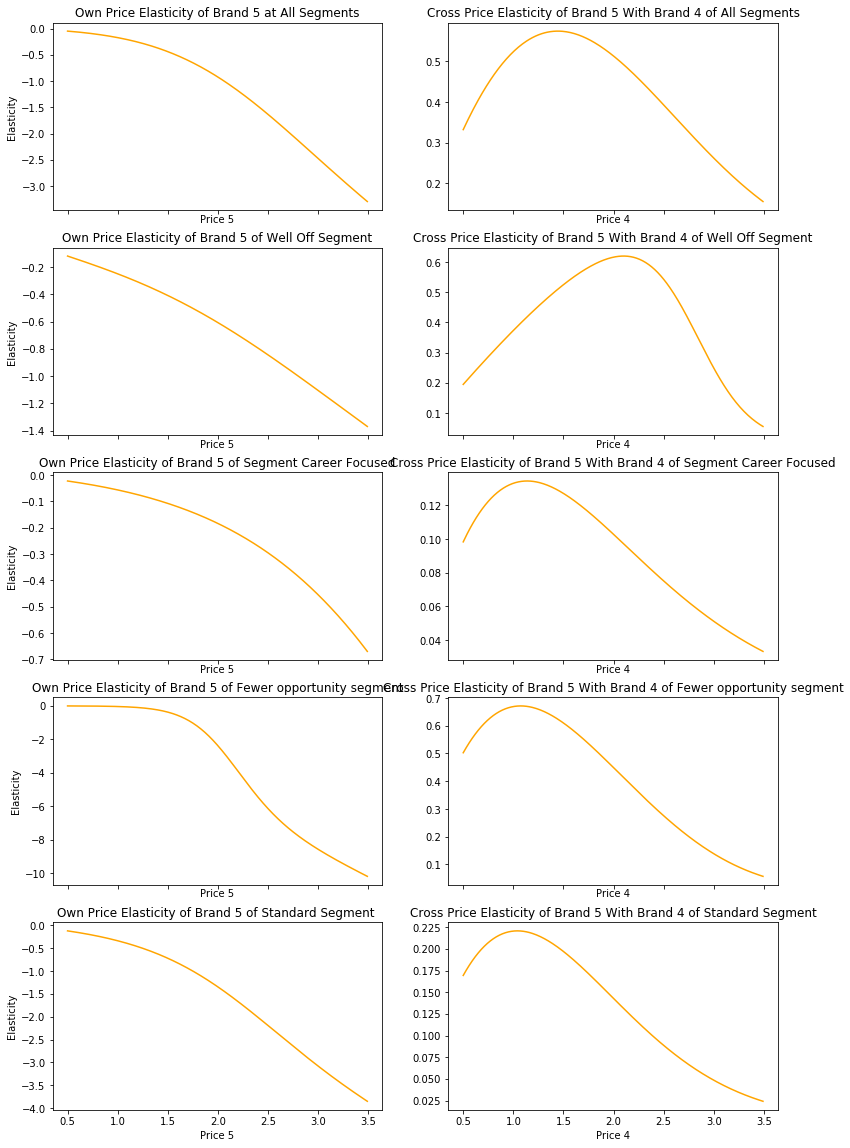

In [281]:
fig, (axs1,axs2,axs3,axs4,axs5) = plt.subplots(5,2,figsize=(13,20),sharex=True)
axs1[0].plot(price_range,brand_5_elast,color='orange')
axs1[0].set_title('Own Price Elasticity of Brand 5 at All Segments') # General 
axs1[0].set_xlabel('Price 5')
axs1[0].set_ylabel('Elasticity')
axs1[1].plot(price_range,df_brand_4_cross_brand_5_elast,color='orange')
axs1[1].set_title('Cross Price Elasticity of Brand 5 With Brand 4 of All Segments')
axs1[1].set_xlabel('Price 4')

axs2[0].plot(price_range,own_price_elst_s0,color='orange') # Well off segment 
axs2[0].set_title('Own Price Elasticity of Brand 5 of Well Off Segment')
axs2[0].set_xlabel('Price 5')
axs2[0].set_ylabel('Elasticity')
axs2[1].plot(price_range,df_cross_brand_4_brand_5_elast_s0,color='orange')
axs2[1].set_title('Cross Price Elasticity of Brand 5 With Brand 4 of Well Off Segment')
axs2[1].set_xlabel('Price 4')

axs3[0].plot(price_range,own_brand_5_s3_elast,color='orange') # career focused 
axs3[0].set_title('Own Price Elasticity of Brand 5 of Segment Career Focused')
axs3[0].set_xlabel('Price 5')
axs3[0].set_ylabel('Elasticity')
axs3[1].plot(price_range,cross_brand_5_brand_4_s3_elas,color='orange')
axs3[1].set_title('Cross Price Elasticity of Brand 5 With Brand 4 of Segment Career Focused')
axs3[1].set_xlabel('Price 4')

axs4[0].plot(price_range,own_brand_5_s1_elast,color='orange') # fewer opportunity
axs4[0].set_title('Own Price Elasticity of Brand 5 of Fewer opportunity segment')
axs4[0].set_xlabel('Price 5')
axs4[0].set_ylabel('Elasticity')
axs4[1].plot(price_range,cross_brand_5_brand_4_s1_elas,color='orange')
axs4[1].set_title('Cross Price Elasticity of Brand 5 With Brand 4 of Fewer opportunity segment')
axs4[1].set_xlabel('Price 4')

axs5[0].plot(price_range,own_brand_5_s2_elast,color='orange') # standard 
axs5[0].set_title('Own Price Elasticity of Brand 5 of Standard Segment ')
axs5[0].set_xlabel('Price 5')
axs5[0].set_ylabel('Elasticity')
axs5[1].plot(price_range,cross_brand_5_brand_4_s2_elas,color='orange')
axs5[1].set_title('Cross Price Elasticity of Brand 5 With Brand 4 of Standard Segment')
axs5[1].set_xlabel('Price 4')

## Price Elasticity of Purchase Quantity 

In [166]:
df_purchase_quan = df_pa[df_pa['Incidence']==1]
df_purchase_quan = pd.get_dummies(df_purchase_quan,columns=['Brand'],prefix='Brand',prefix_sep='_')

In [169]:
df_purchase_quan.head()

,ID,Day,Incidence,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,Price_4,...,segment,segment_0,segment_1,segment_2,segment_3,Brand_1,Brand_2,Brand_3,Brand_4,Brand_5
6,200000001,28,1,2,0,0,1.50,1.90,1.99,2.09,...,1,0,1,0,0,0,1,0,0,0
11,200000001,58,1,1,0,0,1.39,1.90,1.91,2.12,...,1,0,1,0,0,0,0,0,0,1
19,200000001,110,1,2,0,0,1.47,1.90,1.99,1.97,...,1,0,1,0,0,1,0,0,0,0
24,200000001,142,1,1,0,0,1.21,1.35,1.99,2.16,...,1,0,1,0,0,0,0,0,1,0
29,200000001,183,1,3,0,0,1.46,1.88,1.97,1.89,...,1,0,1,0,0,0,1,0,0,0


In [170]:
# To get the actual price used to buy certain quantity we need to multiply 
#price * brand if 1 so its used brand will be multlplied by the price 

df_purchase_quan['Price_incidence'] = (df_purchase_quan['Brand_1'] * df_purchase_quan['Price_1'] +
                                       df_purchase_quan['Brand_2'] * df_purchase_quan['Price_2'] +
                                       df_purchase_quan['Brand_3'] * df_purchase_quan['Price_3'] +
                                       df_purchase_quan['Brand_4'] * df_purchase_quan['Price_4'] +
                                       df_purchase_quan['Brand_5'] * df_purchase_quan['Price_5'] )
# as for promotion if the certain row with ceratin brand used a promotion te result will be 1 or 0 
df_purchase_quan['Promotion_incidence'] = (df_purchase_quan['Brand_1'] * df_purchase_quan['Promotion_1'] +
                                           df_purchase_quan['Brand_2'] * df_purchase_quan['Promotion_2'] +
                                           df_purchase_quan['Brand_3'] * df_purchase_quan['Promotion_3'] +
                                           df_purchase_quan['Brand_4'] * df_purchase_quan['Promotion_4'] +
                                           df_purchase_quan['Brand_5'] * df_purchase_quan['Promotion_5'] )

In [172]:
y = df_purchase_quan['Quantity']
x = df_purchase_quan[['Price_incidence','Promotion_incidence']]

In [173]:
model_quan = LinearRegression()

In [174]:
model_quan.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [183]:
quan_coef = model_quan.coef_
quan_coef[0]

-0.8173651016685014

## Price Elasticity for purchase quantity ..with promotion

In [177]:
df_price_elast_quan = pd.DataFrame(index=np.arange(price_range.size))

In [178]:
df_price_elast_quan['price_incidence'] = price_range
df_price_elast_quan['promotion_incidence'] = 1

In [179]:
df_price_elast_quan.head()

,price_incidence,promotion_incidence
0,0.50,1
1,0.51,1
2,0.52,1
3,0.53,1
4,0.54,1


In [181]:
predict_quant = model_quan.predict(df_price_elast_quan)

In [184]:
price_elast_quant_promo_yes =  quan_coef[0] * price_range / predict_quant

In [ ]:
df_price_elasticities['PE_quan_promotion_1'] = price_elast_quant_promo_yes

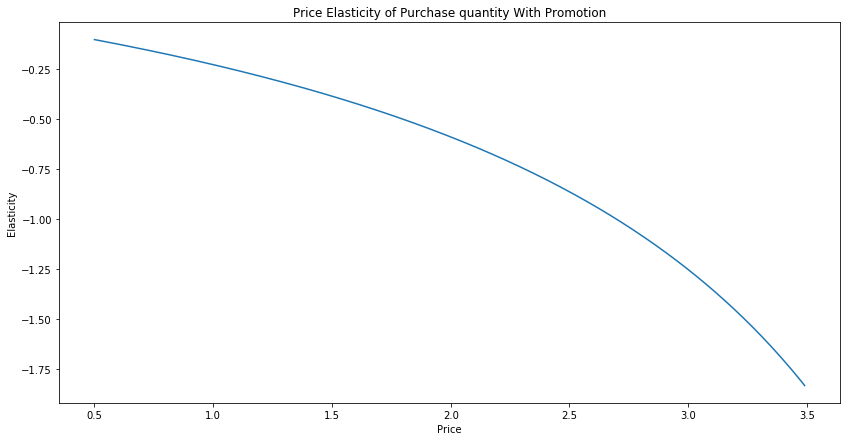

In [185]:
plt.figure(figsize=(14,7))
plt.plot(price_range,price_elast_quant_promo_yes)
plt.title('Price Elasticity of Purchase quantity With Promotion')
plt.xlabel('Price')
plt.ylabel('Elasticity');

## Price Elasticity for purchase quantity ..with No promotion

In [186]:
df_price_elast_quan_no_promo = pd.DataFrame(index=np.arange(price_range.size))

In [188]:
df_price_elast_quan_no_promo['price_incidence'] = price_range
df_price_elast_quan_no_promo['promotion_incidence'] = 0

In [189]:
predict_quant_no_promo = model_quan.predict(df_price_elast_quan_no_promo)

In [190]:
price_elast_quant_promo_no = quan_coef[0] * price_range / predict_quant_no_promo

In [191]:
df_price_elasticities ['PE_quant_promotion_0']= price_elast_quant_promo_no

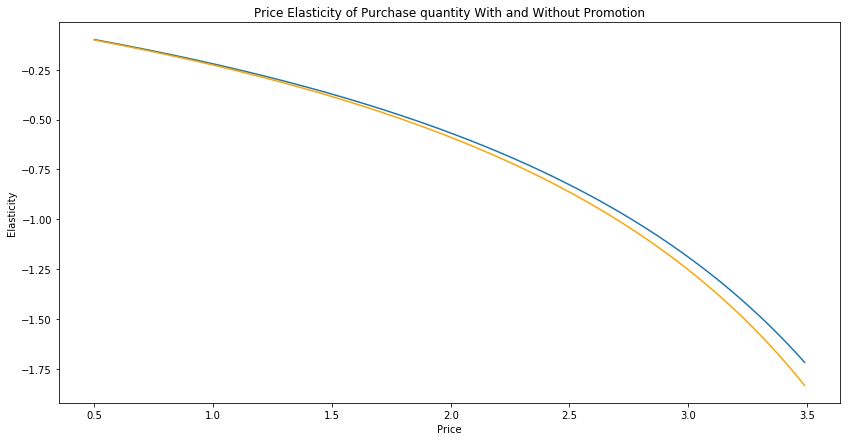

In [193]:
plt.figure(figsize=(14,7))
plt.plot(price_range,price_elast_quant_promo_no)
plt.plot(price_range,price_elast_quant_promo_yes,color='orange')
plt.title('Price Elasticity of Purchase quantity With and Without Promotion')
plt.xlabel('Price')
plt.ylabel('Elasticity');

##### obviously from this graph we can see that the purchase quantity with promotion slightly differ at the higher prices from the no promotion curve and no promotion curve is more elastic than purchase quantity with promotion